<center><h1>Moore_Andrew_HW6</h1></center>

Name: Andrew Moore
<br>
Github Username: drewm8080
<br>
USC ID: 7583780941

Using one of my late days and submitting one day late

## 1. Tree-Based Methods

Import packages

In [170]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from IPython.display import Image

### (a) Download the APS Failure data

In [3]:
train_df = pd.read_csv('../data/aps_failure_training_set.csv', skiprows= 19)
test_df = pd.read_csv('../data/aps_failure_test_set.csv', skiprows= 19)

In [21]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [22]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Reference: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

The main methods of imputation are mean, median, mode 
You could also impute with a model like KNN

For this dataset, we will try mean

In [4]:
# replacing the na values with Np.NAN
test_df = test_df.replace({"na": np.nan})
train_df= train_df.replace({"na": np.nan})

# getting columns to impute 
columns = list(train_df.columns)
columns = columns[1:]
# training the imputer on the train data 
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
train_df[columns]= imp.fit_transform(train_df[columns])
test_df[columns]= imp.transform(test_df[columns])

In [36]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [37]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816.0,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814.0,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [75]:
combined = pd.concat([train_df,test_df],axis= 0)
combined = combined.reset_index(drop =True)
combined

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852.0,0.713189,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636.0,0.713189,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110.0,0.713189,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [76]:
statistics = combined.describe()
statistics.loc['CV'] = statistics.loc['std'] / statistics.loc['mean']
cv= statistics.loc['CV']
cv = cv.sort_values(ascending = False)
cv

cf_000    194.438323
co_000    194.089168
ad_000    193.955307
cs_009    193.045035
dj_000    120.084900
             ...    
bo_000      0.461460
bp_000      0.425256
bq_000      0.398499
br_000      0.382003
cd_000      0.000000
Name: CV, Length: 170, dtype: float64

#### (iii) Plot a correlation matrix

In [77]:
combined.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019562,-0.011690,-0.000472,0.025819,0.036032,0.011681,0.076380,0.195163,0.307446,...,0.414126,0.419913,0.409660,0.419782,0.425680,0.356969,0.259669,0.133764,0.006754,0.010299
ab_000,0.019562,1.000000,-0.010765,0.000076,0.025035,0.043458,0.000576,0.006554,0.023500,0.035739,...,0.024723,0.036606,0.028305,0.033824,0.023791,0.013550,0.001869,0.000198,0.046995,0.075732
ac_000,-0.011690,-0.010765,1.000000,-0.002125,-0.004769,-0.010612,0.015530,-0.002325,-0.009434,-0.022899,...,-0.009843,-0.006467,-0.007988,-0.008137,-0.014707,-0.018666,0.010423,0.017288,-0.006192,0.015826
ad_000,-0.000472,0.000076,-0.002125,1.000000,-0.000204,-0.000245,-0.000038,-0.000020,-0.000063,-0.000173,...,-0.000758,-0.000804,-0.000797,-0.000632,-0.000661,-0.000391,-0.000720,-0.000465,-0.000083,-0.000094
ae_000,0.025819,0.025035,-0.004769,-0.000204,1.000000,0.829986,-0.000440,-0.000604,0.001960,0.020700,...,0.012786,0.019473,0.012878,0.026469,0.066565,0.036649,-0.008379,-0.006947,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013550,-0.018666,-0.000391,0.036649,0.046529,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227099,0.063065,-0.000228,0.000908
ee_008,0.259669,0.001869,0.010423,-0.000720,-0.008379,-0.010821,0.000067,0.005352,0.009108,0.020683,...,0.442532,0.470574,0.448390,0.394021,0.365686,0.227099,1.000000,0.690147,-0.005137,-0.001966
ee_009,0.133764,0.000198,0.017288,-0.000465,-0.006947,-0.008531,-0.001103,-0.003540,-0.009090,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003156,-0.001065
ef_000,0.006754,0.046995,-0.006192,-0.000083,0.063587,0.093474,-0.000075,0.001152,0.005659,0.011098,...,0.003813,0.010263,0.003071,0.027007,0.005384,-0.000228,-0.005137,-0.003156,1.000000,0.222579


#### (iv) Make scatter plots and box plots

In [78]:
top_cv = cv.head(13)
columns = list(top_cv.keys())
combined_top_cv = combined[columns]

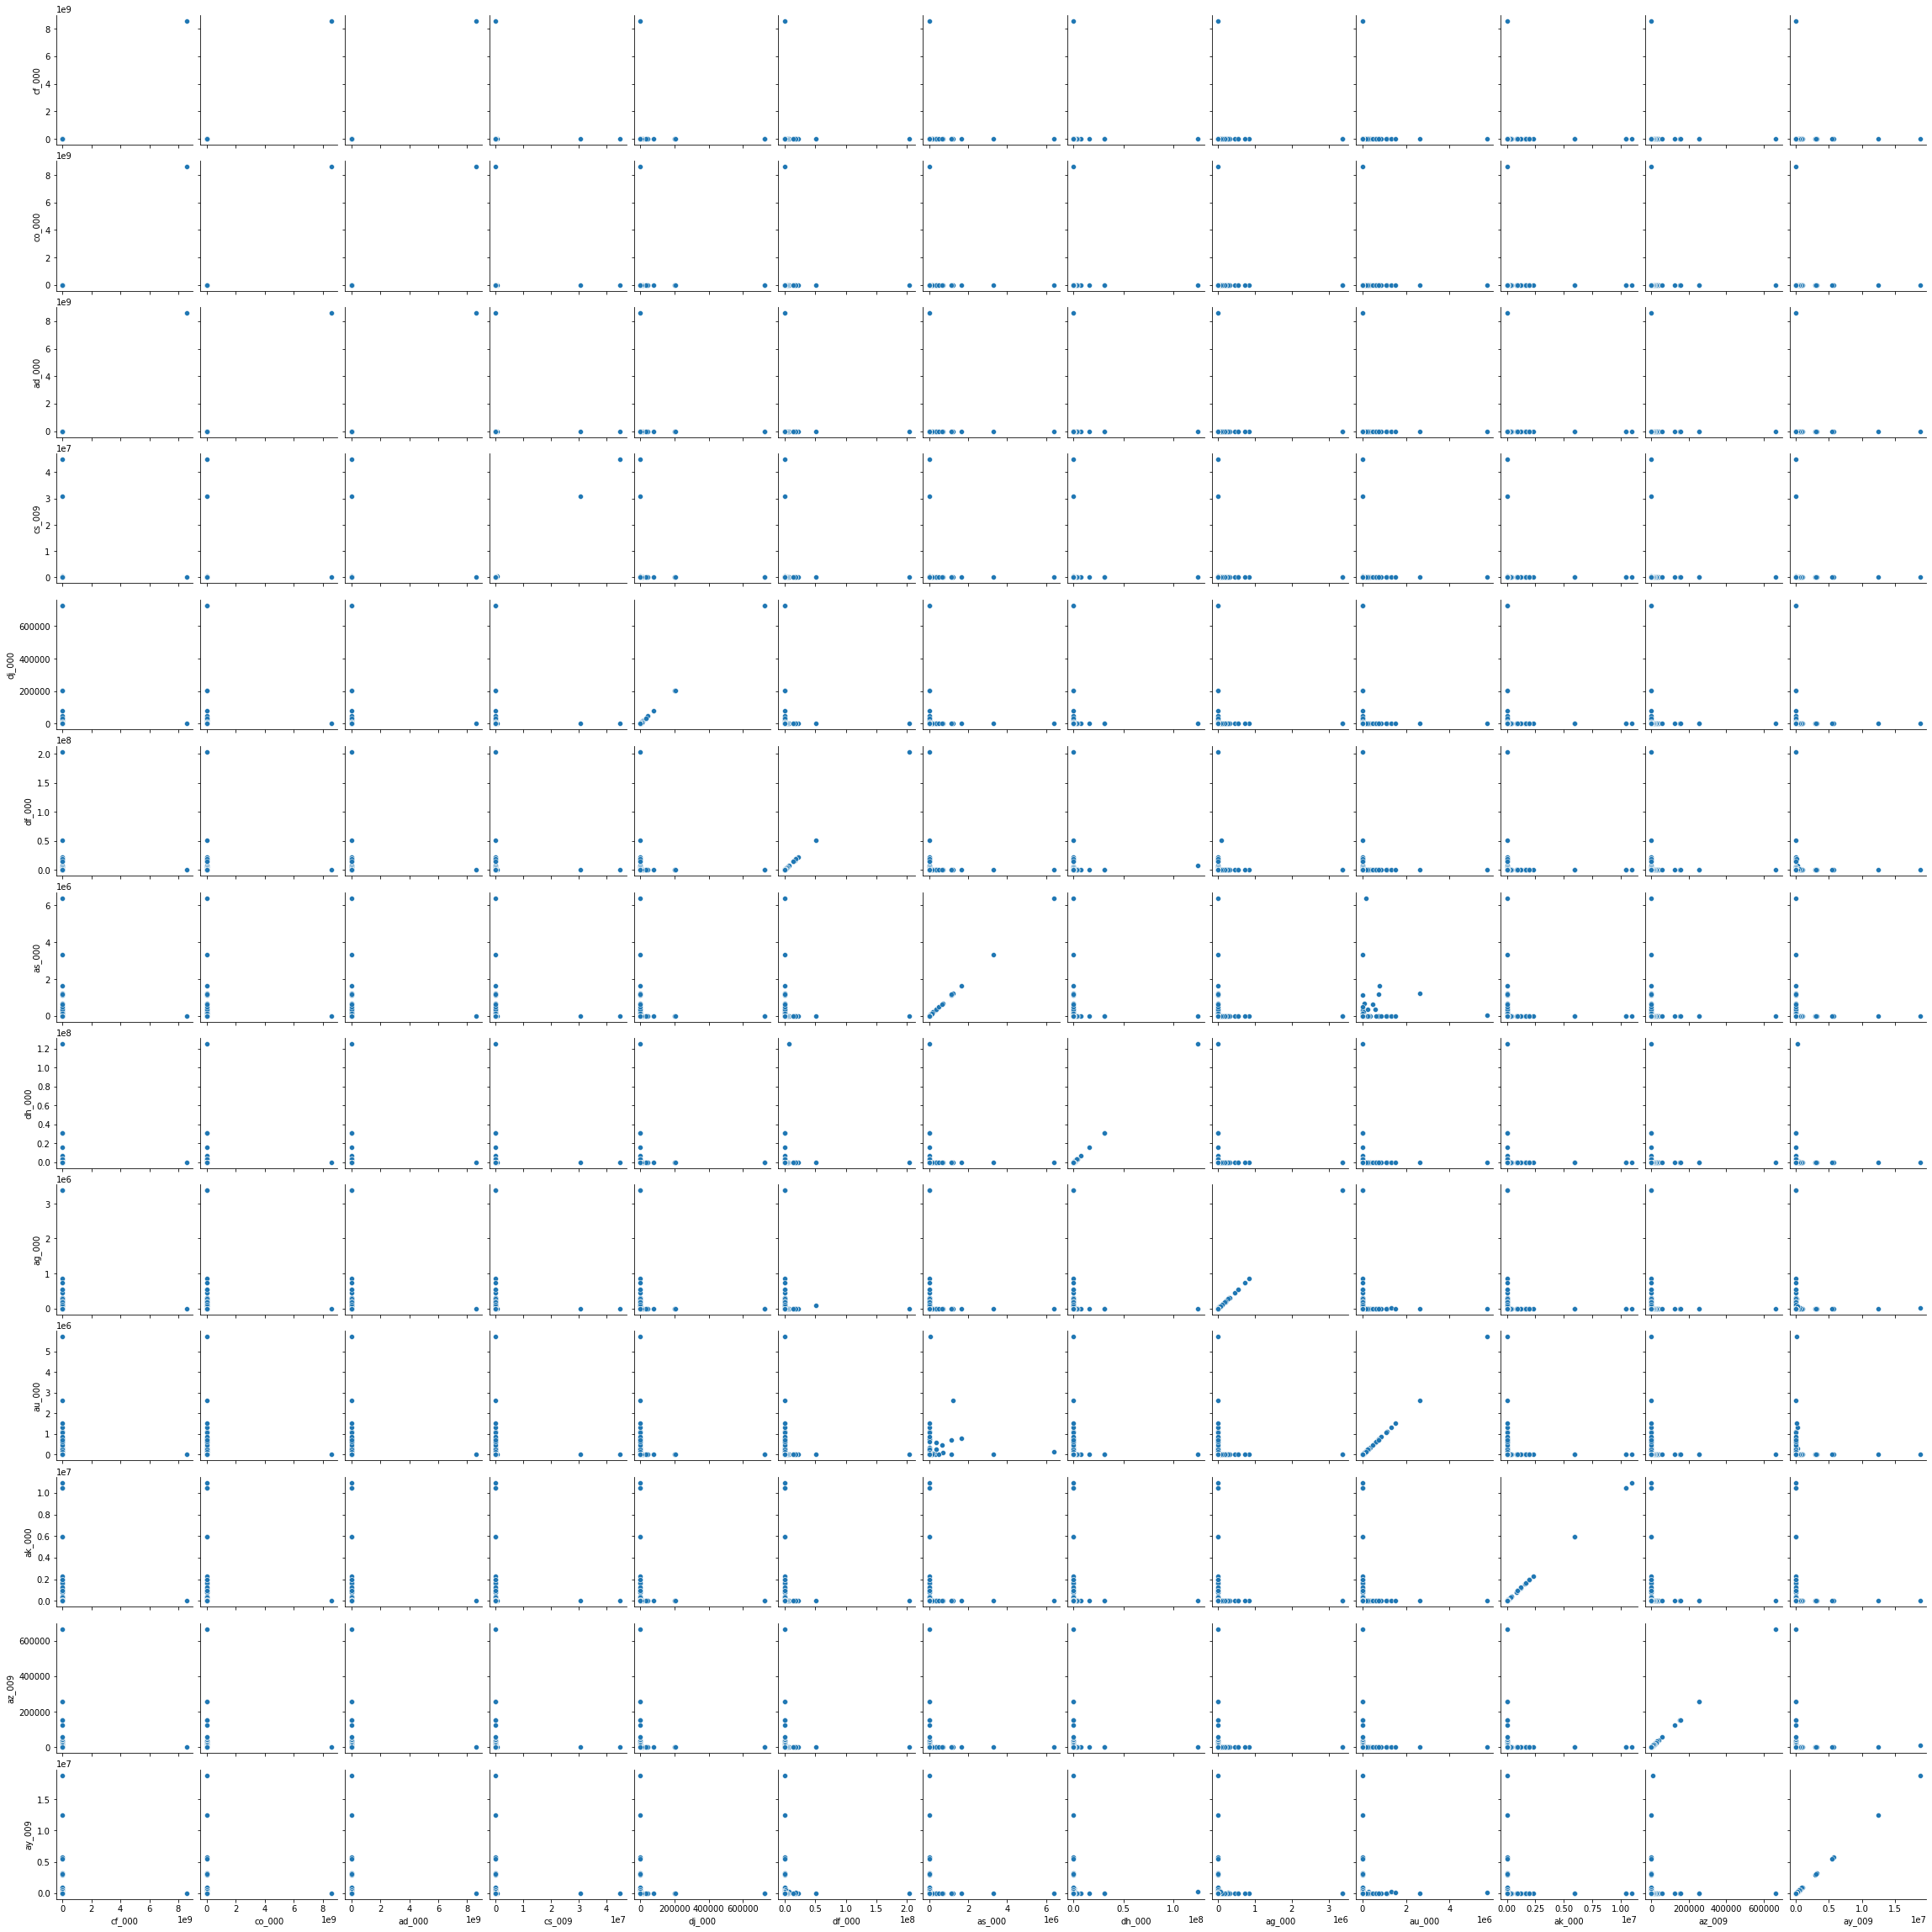

In [79]:
sns.pairplot(combined_top_cv, diag_kind=None)

In [80]:
print('It is very hard to tell which features might be signficant just by the scatterplots.')

It is very hard to tell which features might be signficant just by the scatterplots.


<AxesSubplot:xlabel='column', ylabel='values'>

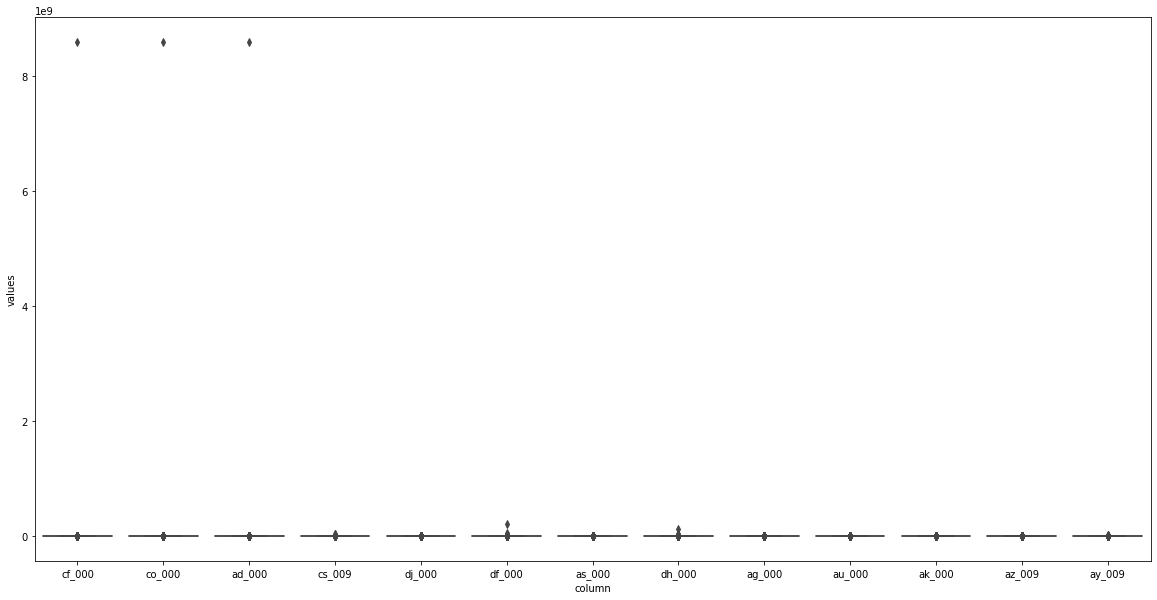

In [81]:
df_melted = pd.melt(combined_top_cv, var_name="column", value_name="values")
plt.figure(figsize=(20,10))
sns.boxplot(x="column", y="values", data=df_melted)

#### (v) Is this data set imbalanced?

In [68]:
print(combined['class'].value_counts())
print('')
print('')
print('Yes this is very imbalanced data due to there being many more negatives than positives')

neg    74625
pos     1375
Name: class, dtype: int64


Yes this is very imbalanced data due to there being many more negatives than positives


### (c) Train a random forest

In [109]:
# unbalanced

# reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# changing the dataframes to make them 0 and 1 
train_df = train_df.replace(to_replace=['neg', 'pos'], value=[0, 1])
test_df = test_df.replace(to_replace=['neg', 'pos'], value=[0, 1])

#columns
columns = train_df.columns[1:]

y_train = train_df[['class']]
x_train = train_df[columns]
y_test = test_df[['class']]
x_test = test_df[columns]
clf = RandomForestClassifier(max_depth=2, random_state=0,oob_score =True)
clf.fit(x_train,y_train.values.ravel())
print("The training error for the OOB score is", 1-clf.oob_score_)
training_pred = clf.predict(x_train)

y_pred= clf.predict(x_test)
test_error = accuracy_score(y_pred,y_test)
misclassification_train = accuracy_score(training_pred,y_train)
print("The test error is",1-test_error)
print('The misclassicfication rate is', 1- misclassification_train)

The training error for the OOB score is 0.014100000000000001
The test error is 0.019062499999999982
The misclassicfication rate is 0.013900000000000023


In [110]:
# unbalanced
# now showing confusion matrixes

print('test confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('training confusion matrix')
print(confusion_matrix(training_pred,y_train))

test confusion matrix
[[15624   304]
 [    1    71]]
training confusion matrix
[[58978   812]
 [   22   188]]


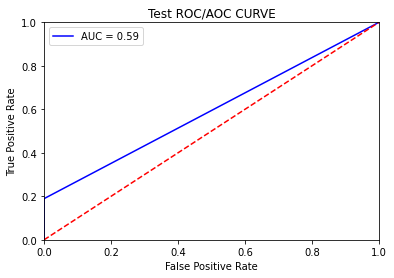

In [111]:
# unbalanced
# reference -- https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Test ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

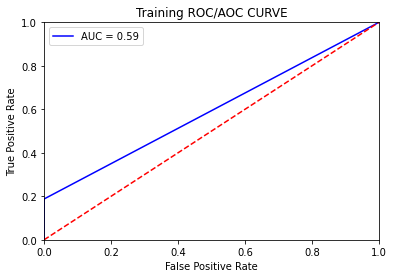

In [112]:
# unbalanced
# Training ROC/AOC Curve
# reference -- https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, threshold = metrics.roc_curve(y_train, training_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Training ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### (d) Research class imbalance in random forest

I found when researching we can use a balanced random forest in the sense that we draw a bootstrap sample with equal proportions of data points from the minority and majority class 

In [ ]:
# reference: https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb

In [113]:
# changing the dataframes to make them 0 and 1 
train_df = train_df.replace(to_replace=['neg', 'pos'], value=[0, 1])
test_df = test_df.replace(to_replace=['neg', 'pos'], value=[0, 1])

#columns
columns = train_df.columns[1:]

y_train = train_df[['class']]
x_train = train_df[columns]
y_test = test_df[['class']]
x_test = test_df[columns]
clf = BalancedRandomForestClassifier(max_depth = 2, random_state=2,oob_score=True)
clf.fit(x_train,y_train.values.ravel())
print("The training error for the OOB score is", 1-clf.oob_score_)
training_pred = clf.predict(x_train)

y_pred= clf.predict(x_test)
test_error = accuracy_score(y_pred,y_test)
misclassification_train = accuracy_score(training_pred,y_train)
print("The test error is",1-test_error)
print('The misclassicfication rate is', 1- misclassification_train)

The training error for the OOB score is 0.03795000000000004
The test error is 0.0633125
The misclassicfication rate is 0.06625000000000003


In [114]:
# balanced
print('test confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('training confusion matrix')
print(confusion_matrix(training_pred,y_train))

test confusion matrix
[[14624    12]
 [ 1001   363]]
training confusion matrix
[[55076    51]
 [ 3924   949]]


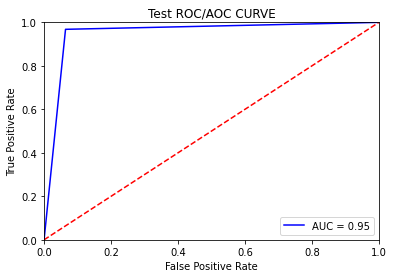

In [115]:
# reference -- https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Test ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

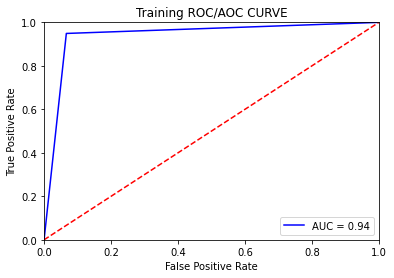

In [116]:
# reference -- https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, threshold = metrics.roc_curve(y_train, training_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Training ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### (e) XGBoost and Model Trees

In [149]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# reference: 

# when using L1, we should standerdize the features 
scaler = StandardScaler()
scaled_xtrain= scaler.fit_transform(x_train)
scaled_xtest= scaler.transform(x_test)

accuracy = []
alpha =[]
regular_alpha = [0.0000001,0.0001,0.001,0.01,0.1,1,2,10,50,100,200,1000]
for i in regular_alpha:
    xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic',reg_alpha = i)
    score = cross_val_score(xgboost_classifier, scaled_xtrain, y_train, cv=5, scoring='accuracy').mean()
    accuracy.append(score)
    alpha.append(i)
    print(i, "is done!")

df = pd.DataFrame(list(zip(alpha,accuracy)),columns = ['Alpha','Accuracy'])
df['Accuracy'] = df['Accuracy'].round(7)
final_df = df.sort_values(by='Accuracy', ascending=False)
final_df

1e-07 is done!
0.0001 is done!
0.001 is done!
0.01 is done!
0.1 is done!
1 is done!
2 is done!
10 is done!
50 is done!
100 is done!
200 is done!
1000 is done!


,Alpha,Accuracy
1,1.000000e-04,0.994767
4,1.000000e-01,0.994733
6,2.000000e+00,0.994667
2,1.000000e-03,0.994633
0,1.000000e-07,0.994617
3,1.000000e-02,0.994583
5,1.000000e+00,0.994100
7,1.000000e+01,0.993850
8,5.000000e+01,0.991867
9,1.000000e+02,0.991150


In [169]:
print('The best alpha was',0.0001, 'with an error of', 1-0.994767)

The best alpha was 0.0001 with an error of 0.005233000000000043


In [165]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic',reg_alpha = 0.0001)
xgboost_classifier.fit(scaled_xtrain,y_train)
y_pred = xgboost_classifier.predict(scaled_xtest)
training_y = xgboost_classifier.predict(scaled_xtrain)

training_accuracy = accuracy_score(y_train,training_y)
testing_accuracy = accuracy_score(y_test,y_pred)
print('Misclassification for training is',1-training_accuracy, 'misclassification for testing is', 1-testing_accuracy)


# confusion matrix
print('test confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('training confusion matrix')
print(confusion_matrix(training_pred,y_train))

Misclassification for training is 1.666666666666483e-05 misclassification for testing is 0.006312500000000054
test confusion matrix
[[15613    89]
 [   12   286]]
training confusion matrix
[[55076    51]
 [ 3924   949]]


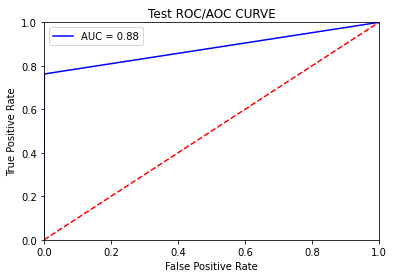

In [166]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Test ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

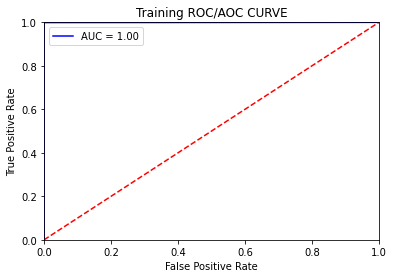

In [167]:

fpr, tpr, threshold = metrics.roc_curve(y_train, training_y)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Training ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [153]:
# reference https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

smote = SMOTE()
smote_x, smote_y = smote.fit_resample(x_train,y_train)

accuracy = []
alpha =[]
regular_alpha = [0.0000001,0.0001,0.001,0.01,0.1,1,2,10,50,100,200,1000]
for i in regular_alpha:
    xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic',reg_alpha = i)
    score = cross_val_score(xgboost_classifier, smote_x, smote_y, cv=5, scoring='accuracy').mean()
    accuracy.append(score)
    alpha.append(i)
    print(i, "is done!")

df = pd.DataFrame(list(zip(alpha,accuracy)),columns = ['Alpha','Accuracy'])
df['Accuracy'] = df['Accuracy'].round(7)
final_df = df.sort_values(by='Accuracy', ascending=False)
final_df

1e-07 is done!
0.0001 is done!
0.001 is done!
0.01 is done!
0.1 is done!
1 is done!
2 is done!
10 is done!
50 is done!
100 is done!
200 is done!
1000 is done!


,Alpha,Accuracy
6,2.000000e+00,0.997398
5,1.000000e+00,0.997356
4,1.000000e-01,0.997339
1,1.000000e-04,0.997314
3,1.000000e-02,0.997305
0,1.000000e-07,0.997280
2,1.000000e-03,0.997212
7,1.000000e+01,0.996500
8,5.000000e+01,0.992788
9,1.000000e+02,0.988864


In [168]:
print('The best alpha was',2, 'with an error of', 1-0.997398)

The best alpha was 2 with an error of 0.002601999999999993


In [161]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic',reg_alpha = 2)
xgboost_classifier.fit(smote_x,smote_y)
y_pred = xgboost_classifier.predict(x_test)
training_y = xgboost_classifier.predict(x_train)

training_accuracy = accuracy_score(y_train,training_y)
testing_accuracy = accuracy_score(y_test,y_pred)
print('Misclassification for training is',1-training_accuracy, 'misclassification for testing is', 1-testing_accuracy)

# confusion matrix
print('test confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('training confusion matrix')
print(confusion_matrix(training_pred,y_train))

Misclassification for training is 6.666666666665932e-05 misclassification for testing is 0.007000000000000006
test confusion matrix
[[15577    64]
 [   48   311]]
training confusion matrix
[[55076    51]
 [ 3924   949]]


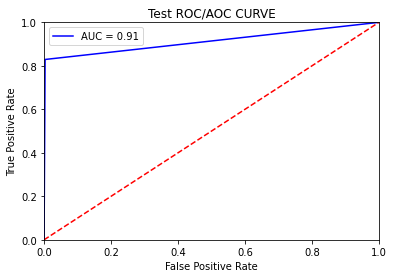

In [162]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Test ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

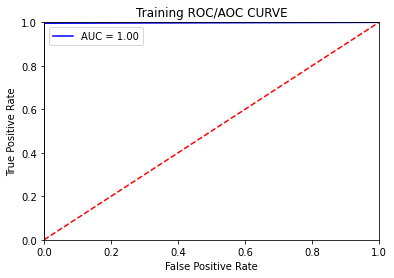

In [163]:
fpr, tpr, threshold = metrics.roc_curve(y_train, training_y)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Training ROC/AOC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The training is the same but the smote data has a higher AUC, so it does better than the non-smote data.

## 2. ISLR 6.6.3

3a. It would steadily decrease because as s increases the coeffients would go to their RSS value
3b. It would be a U shape. It would eventually start overfitting after a certain point
3c. It would increase because it would start overfitting 
3d. Flexibility increasing would lower the bias 
3e. it would not change

## 3. ISLR 6.6.5


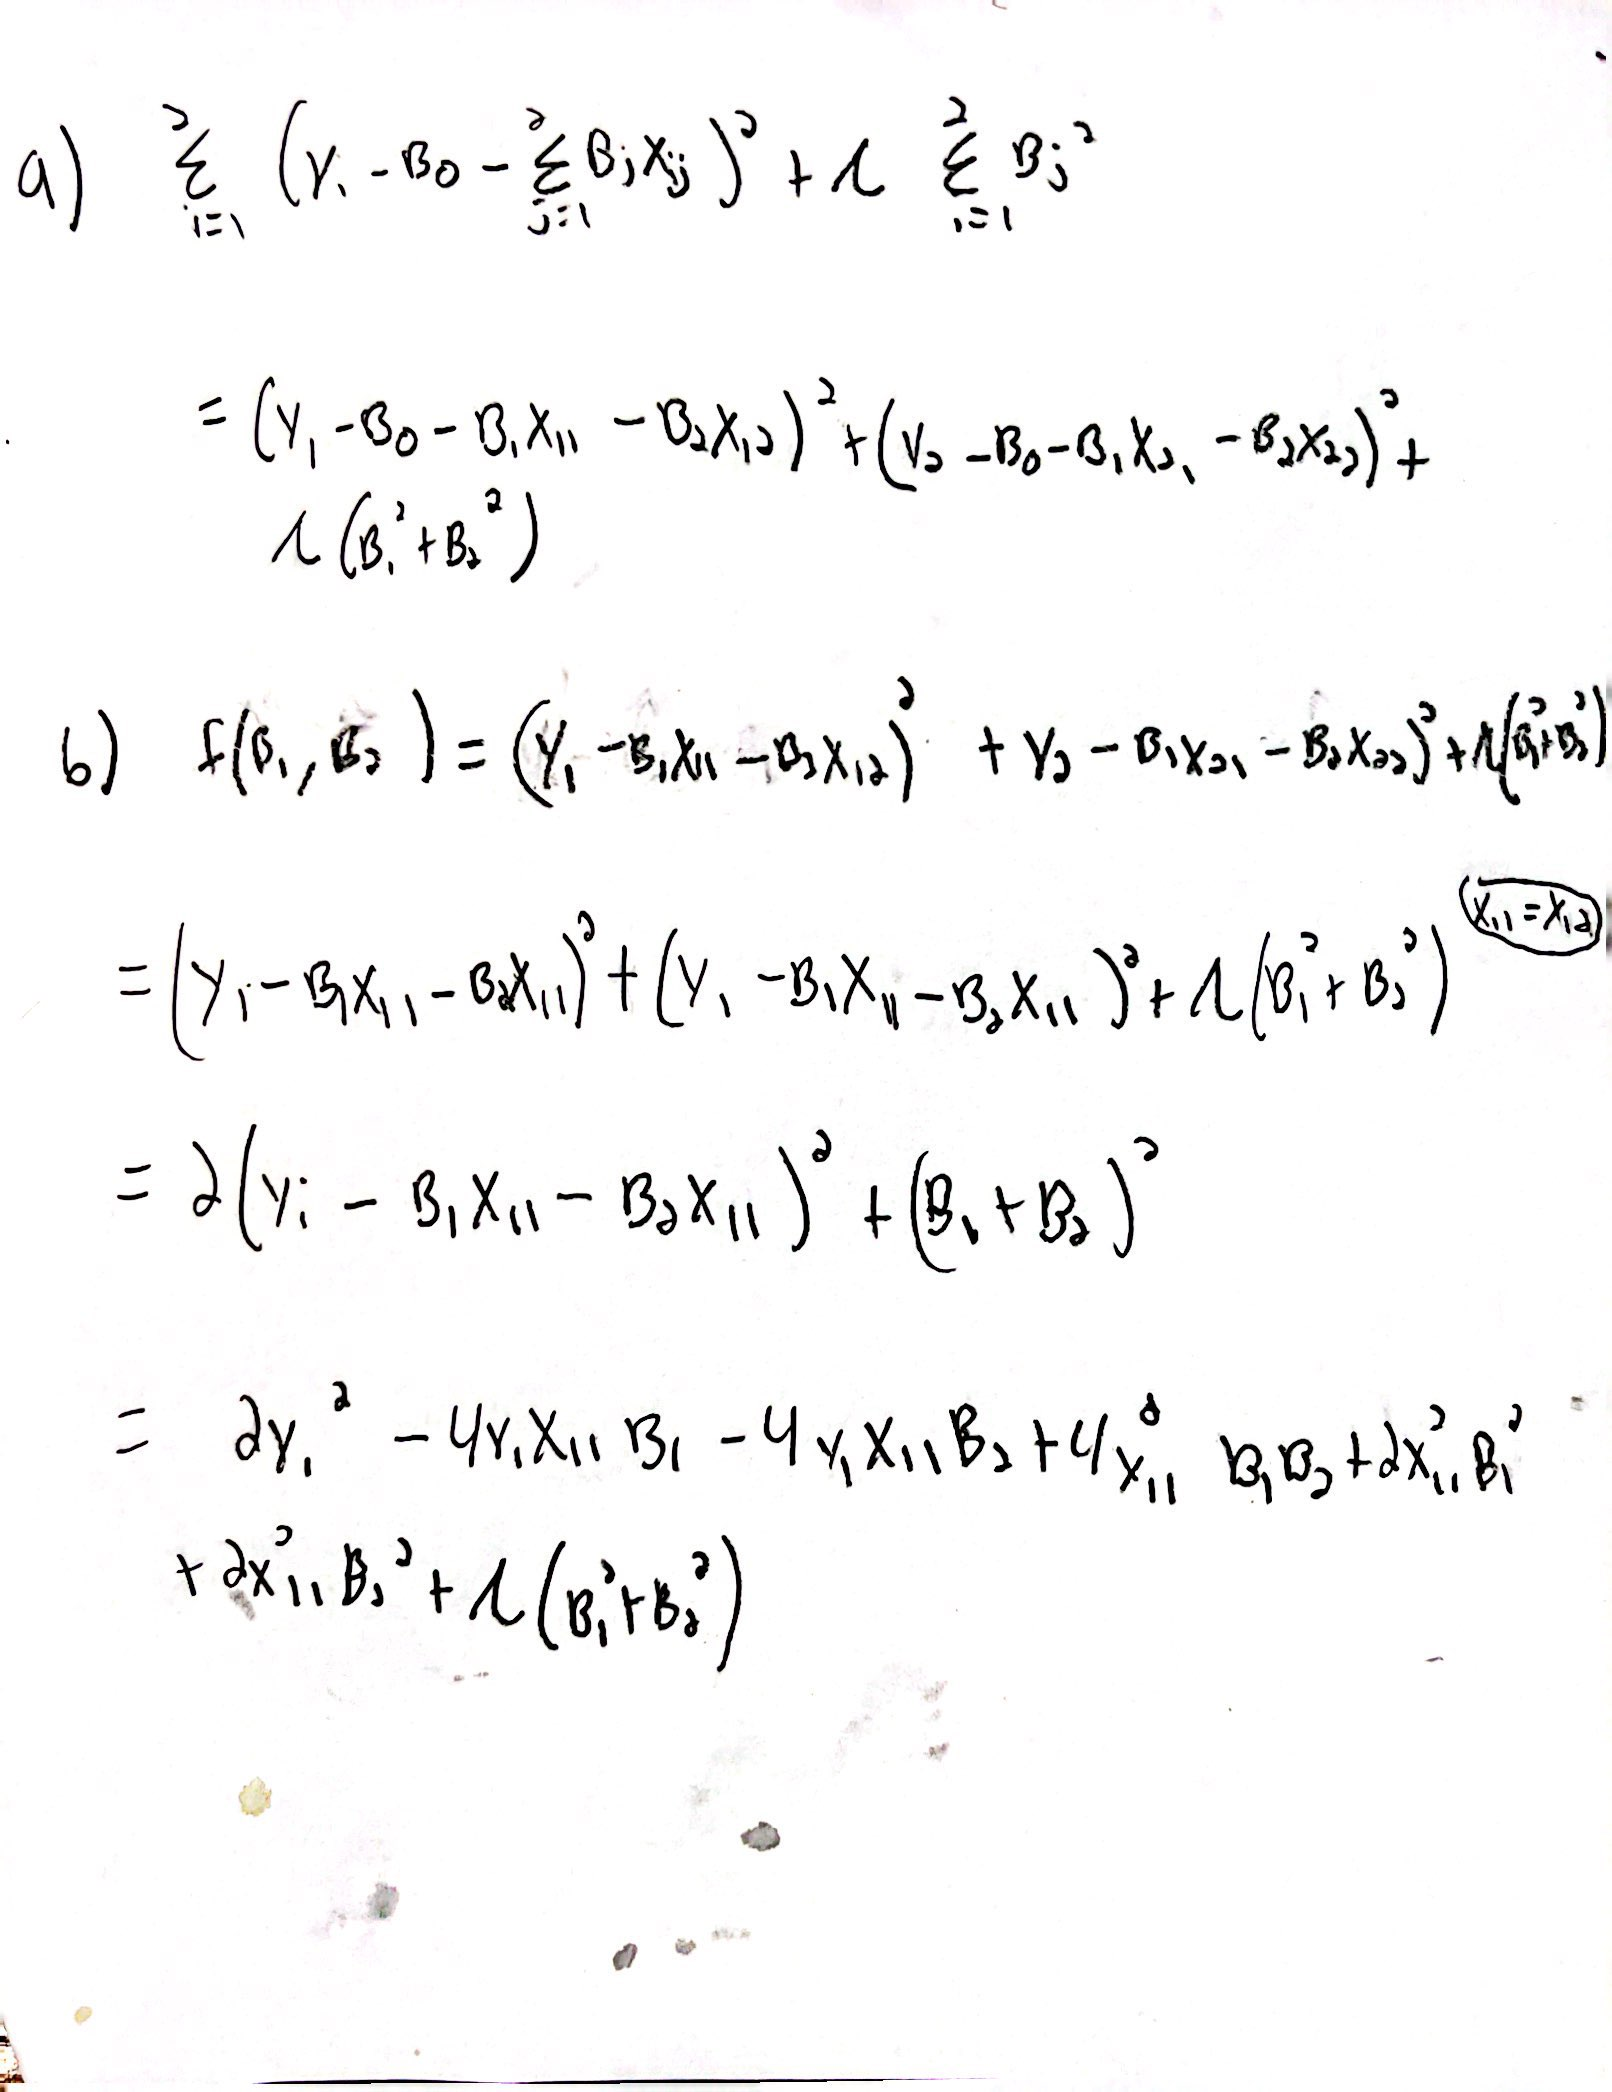

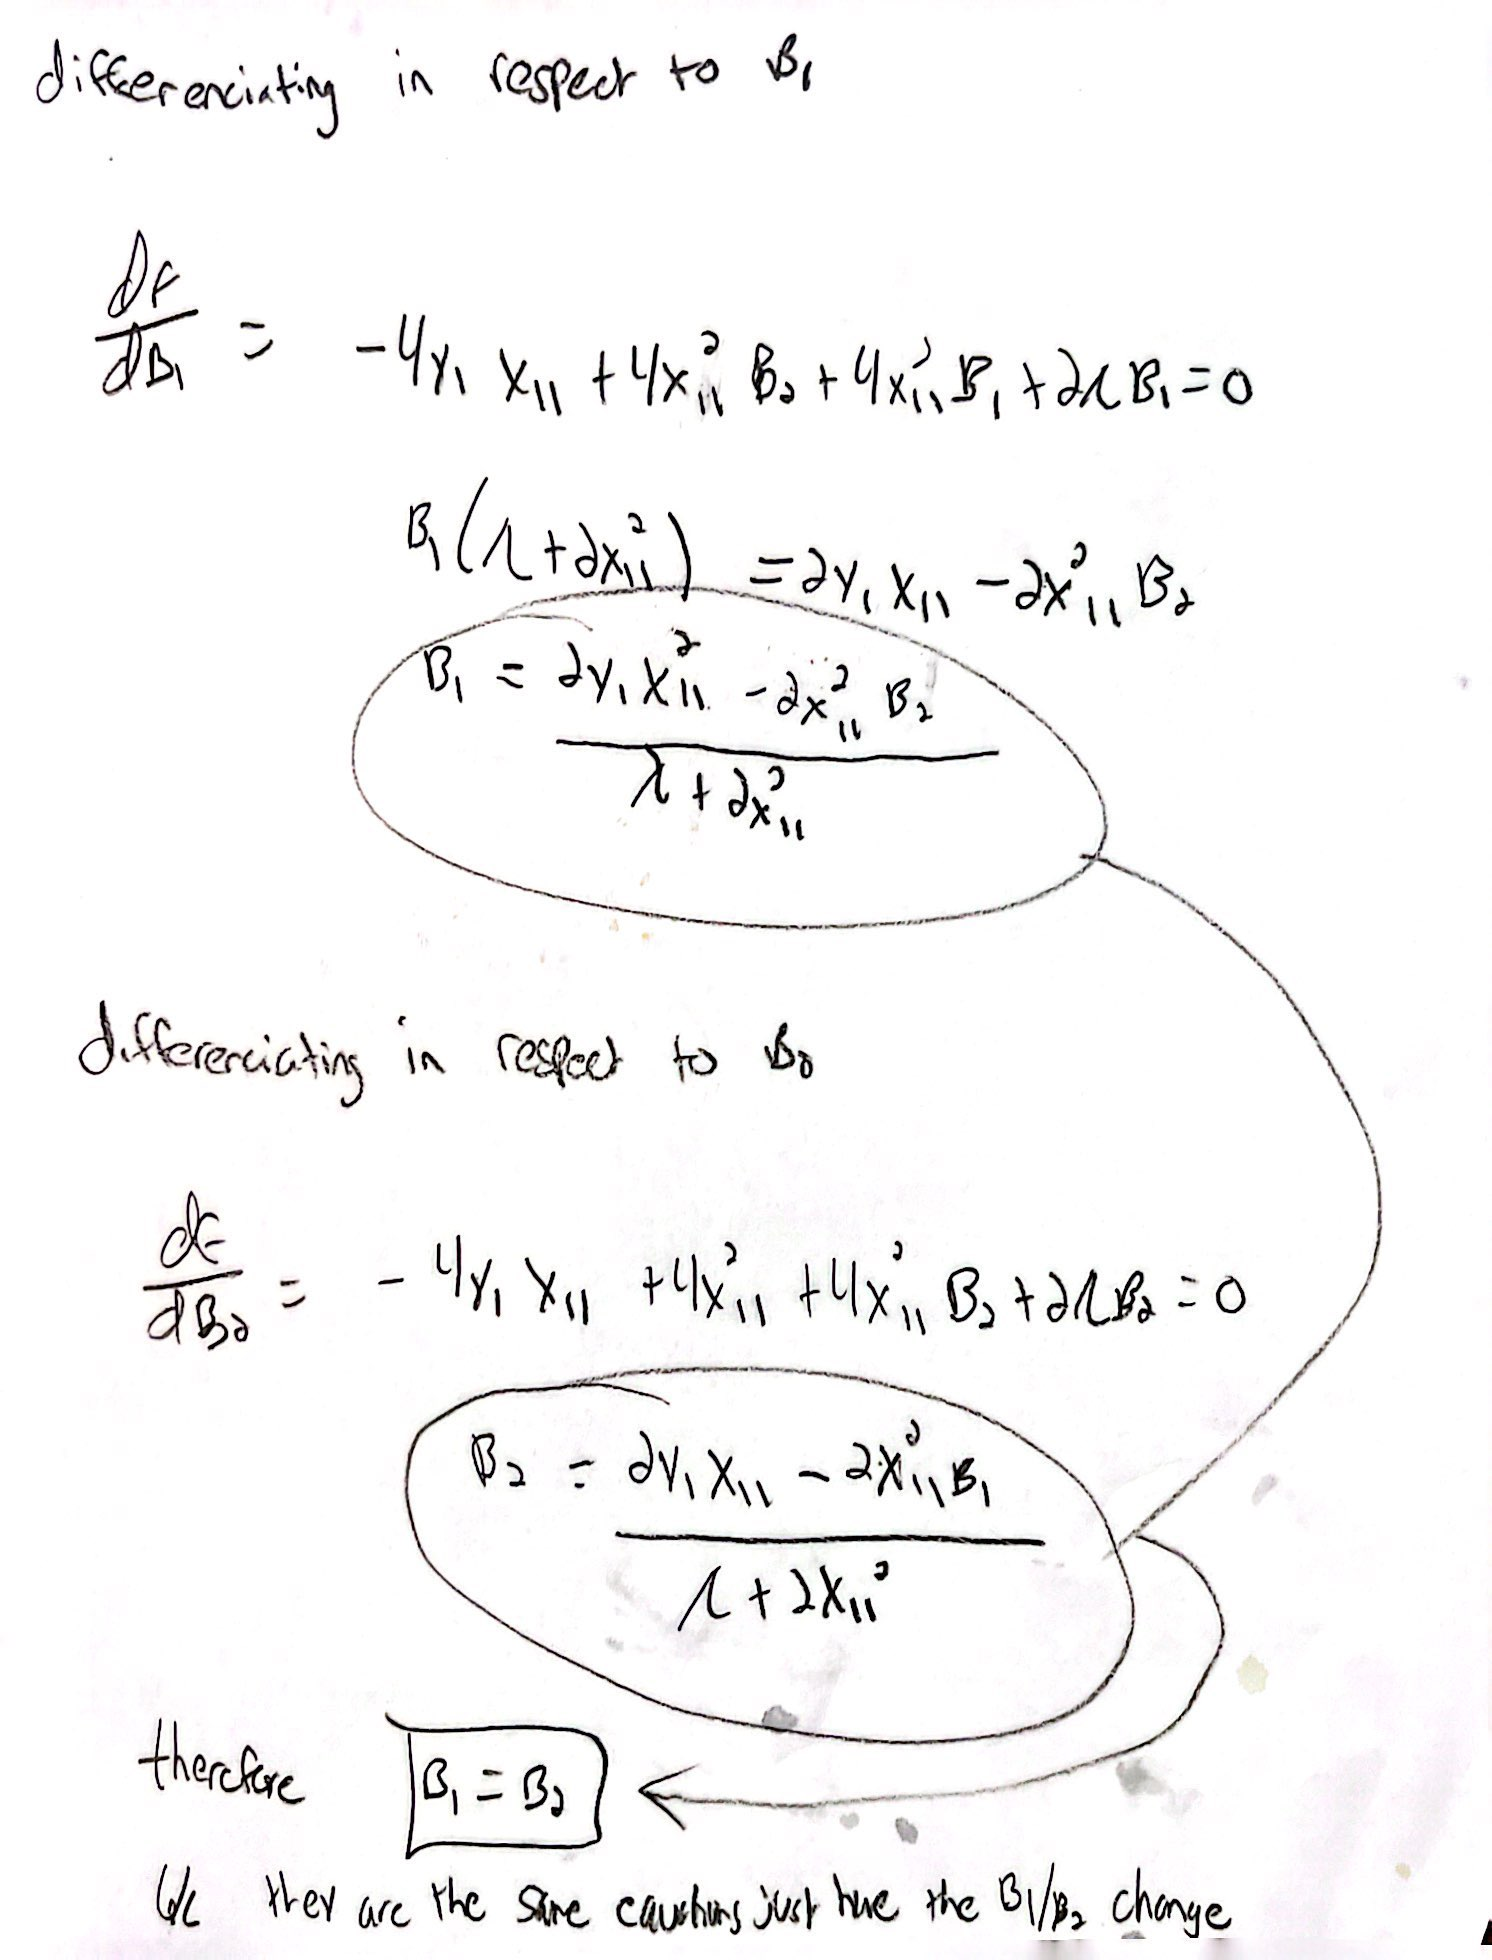

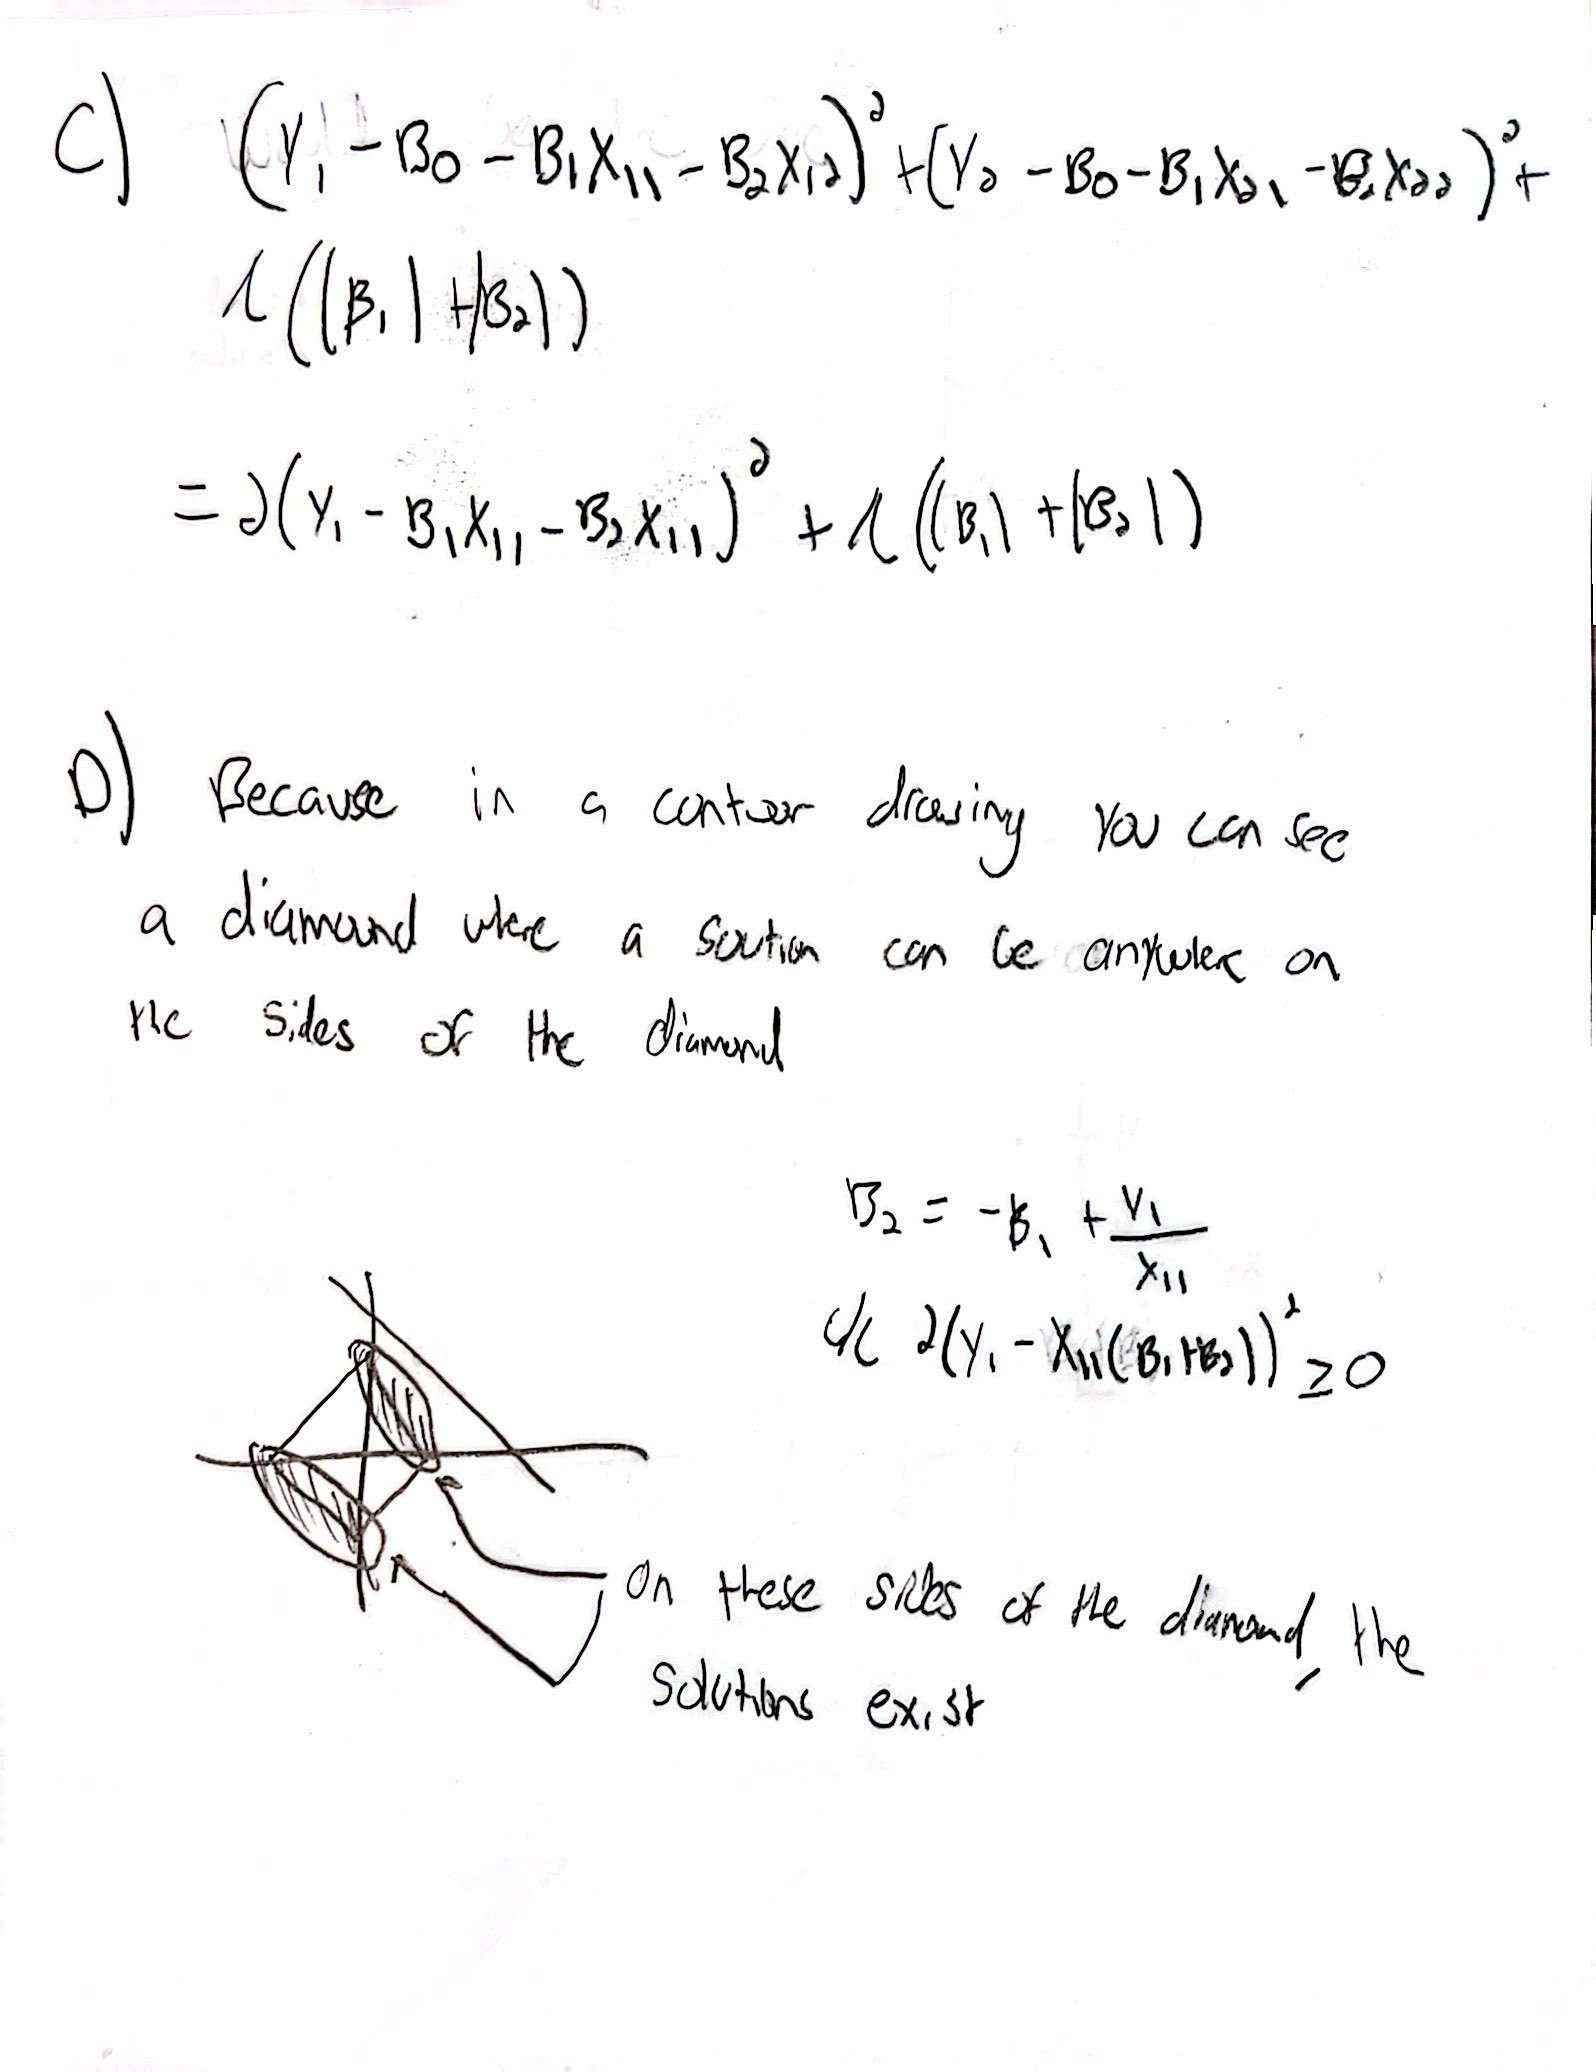

## 4. ISLR 8.4.5

Majority voting: we would see red for the probabilities greater than 0.5. Since red has the 6 above 0.5 and green has 4 below, we classfiy to red
Avg voting: we would take the avg of all (which is 4.5/10 = 0.45), and we would classify to green because its below 0.5

## 5. ISLR 9.7.3

3a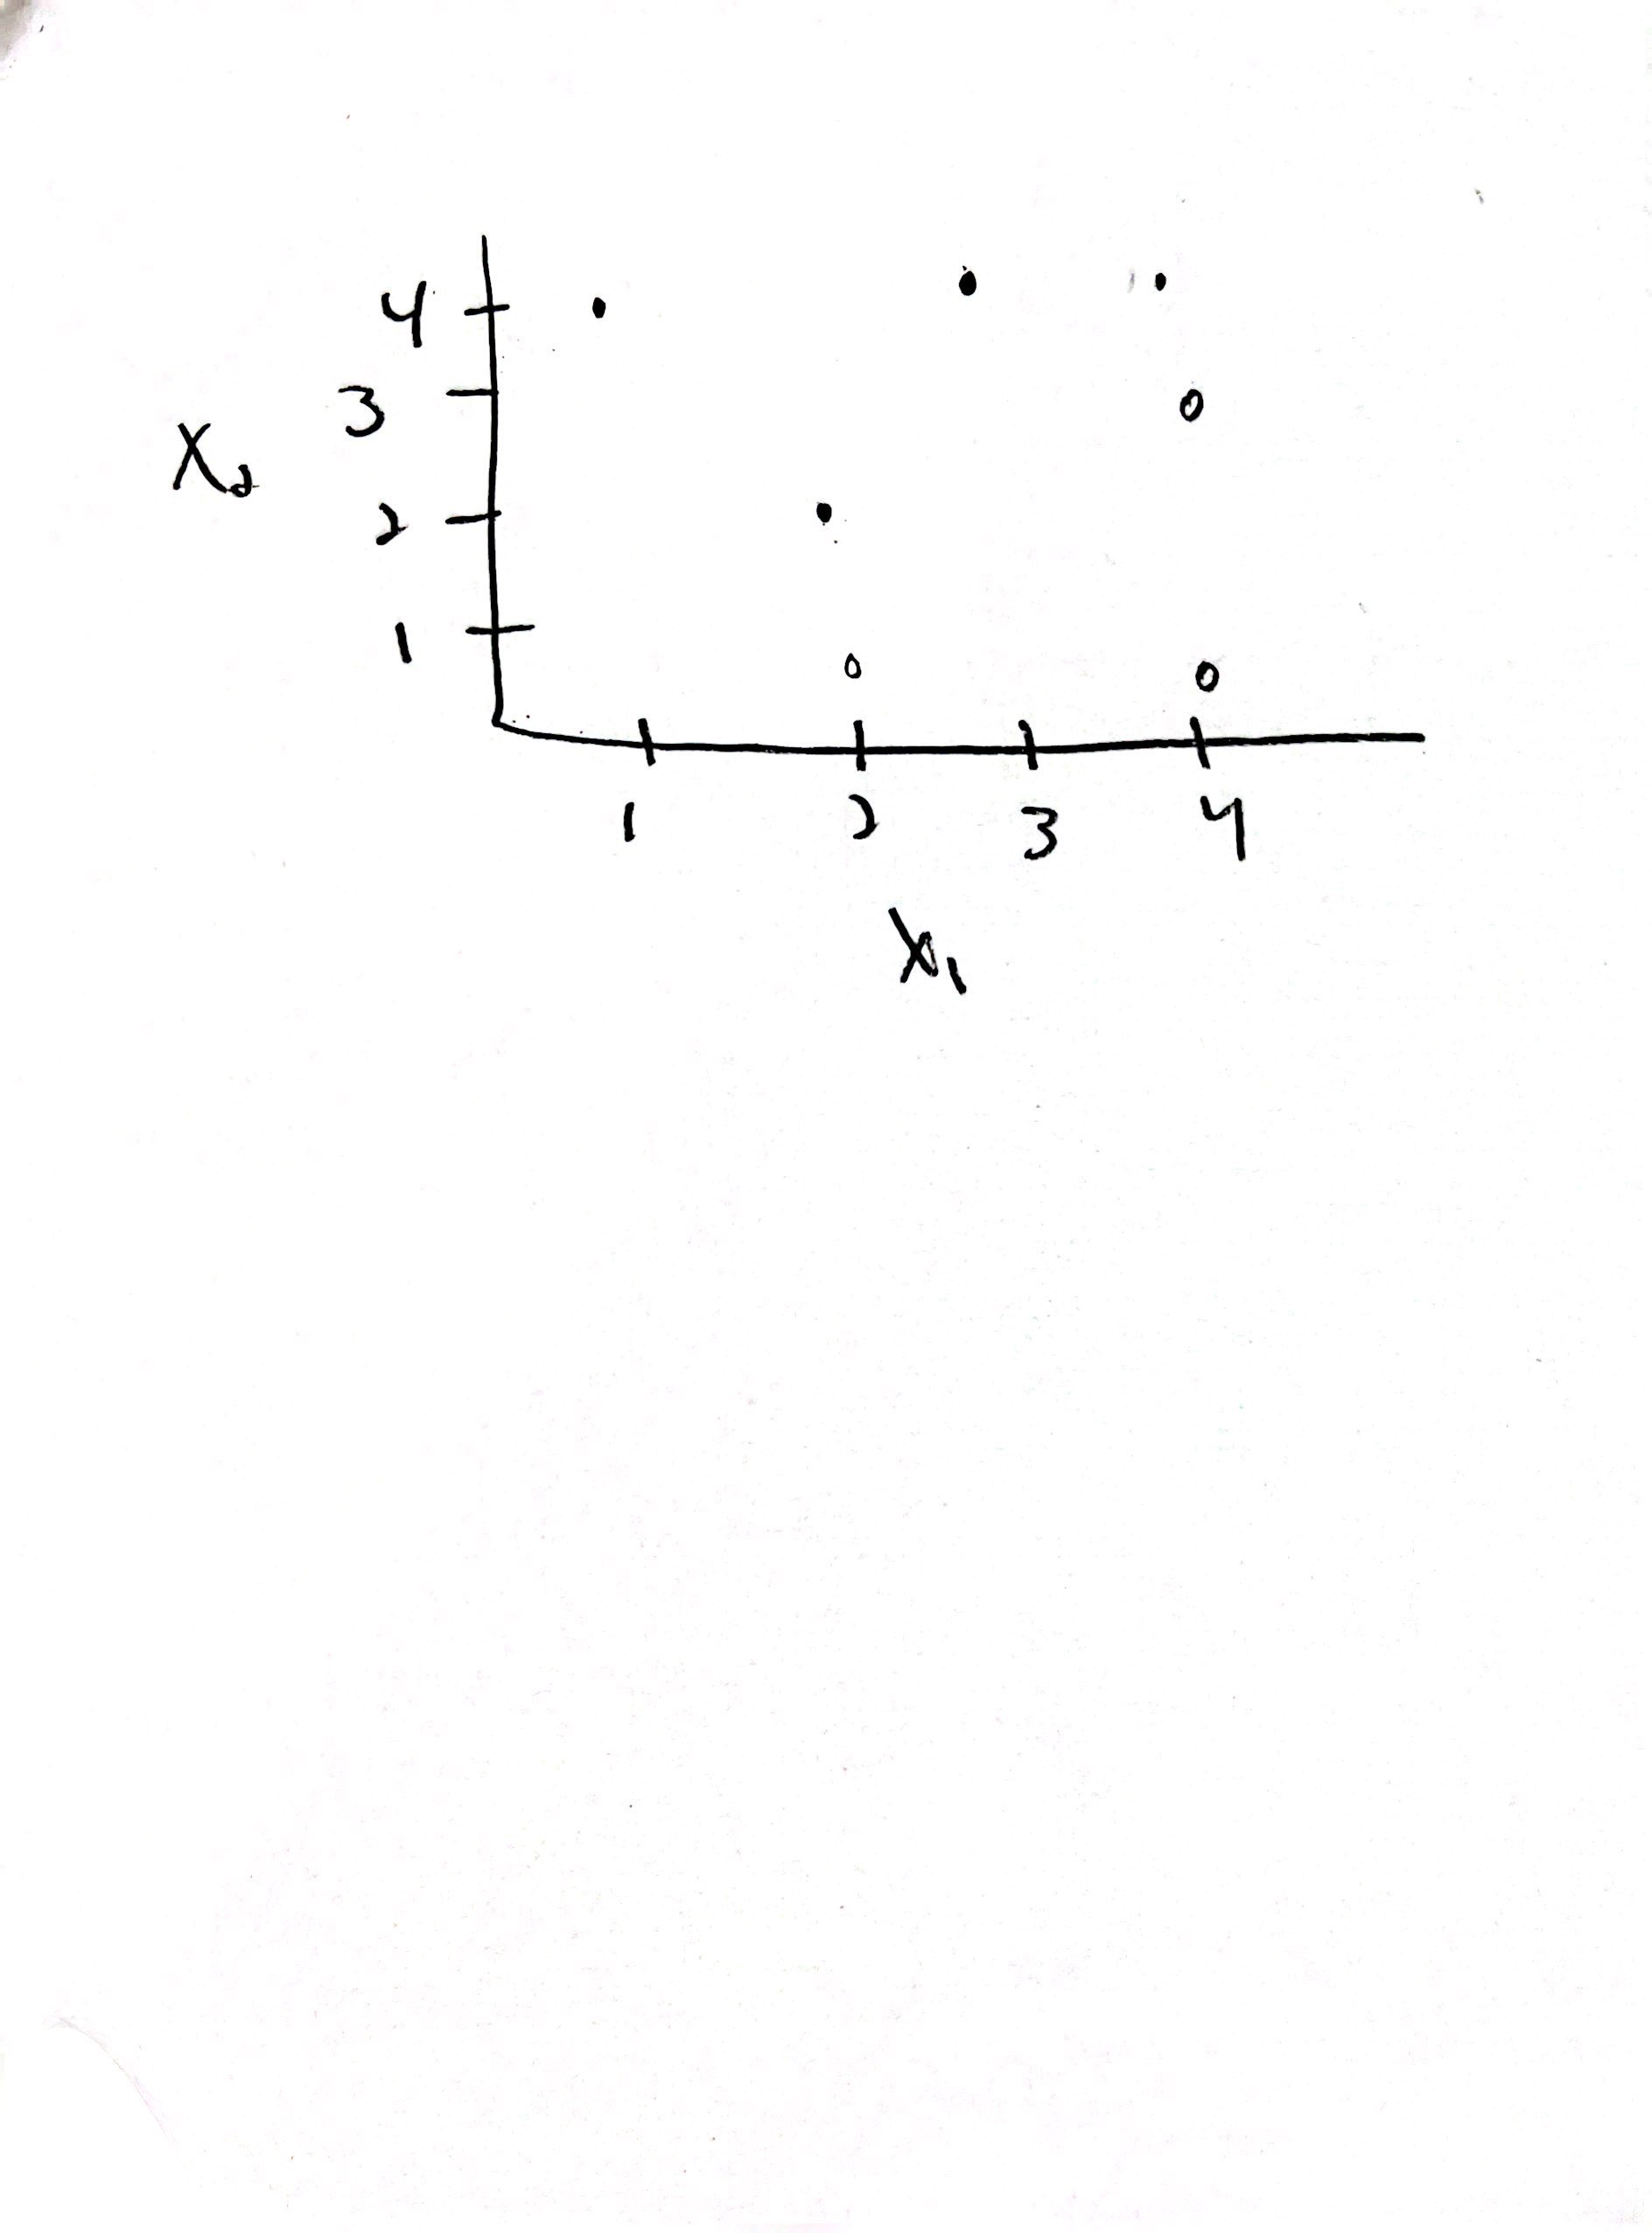

3b

The equation is -.5 -x1+x2=0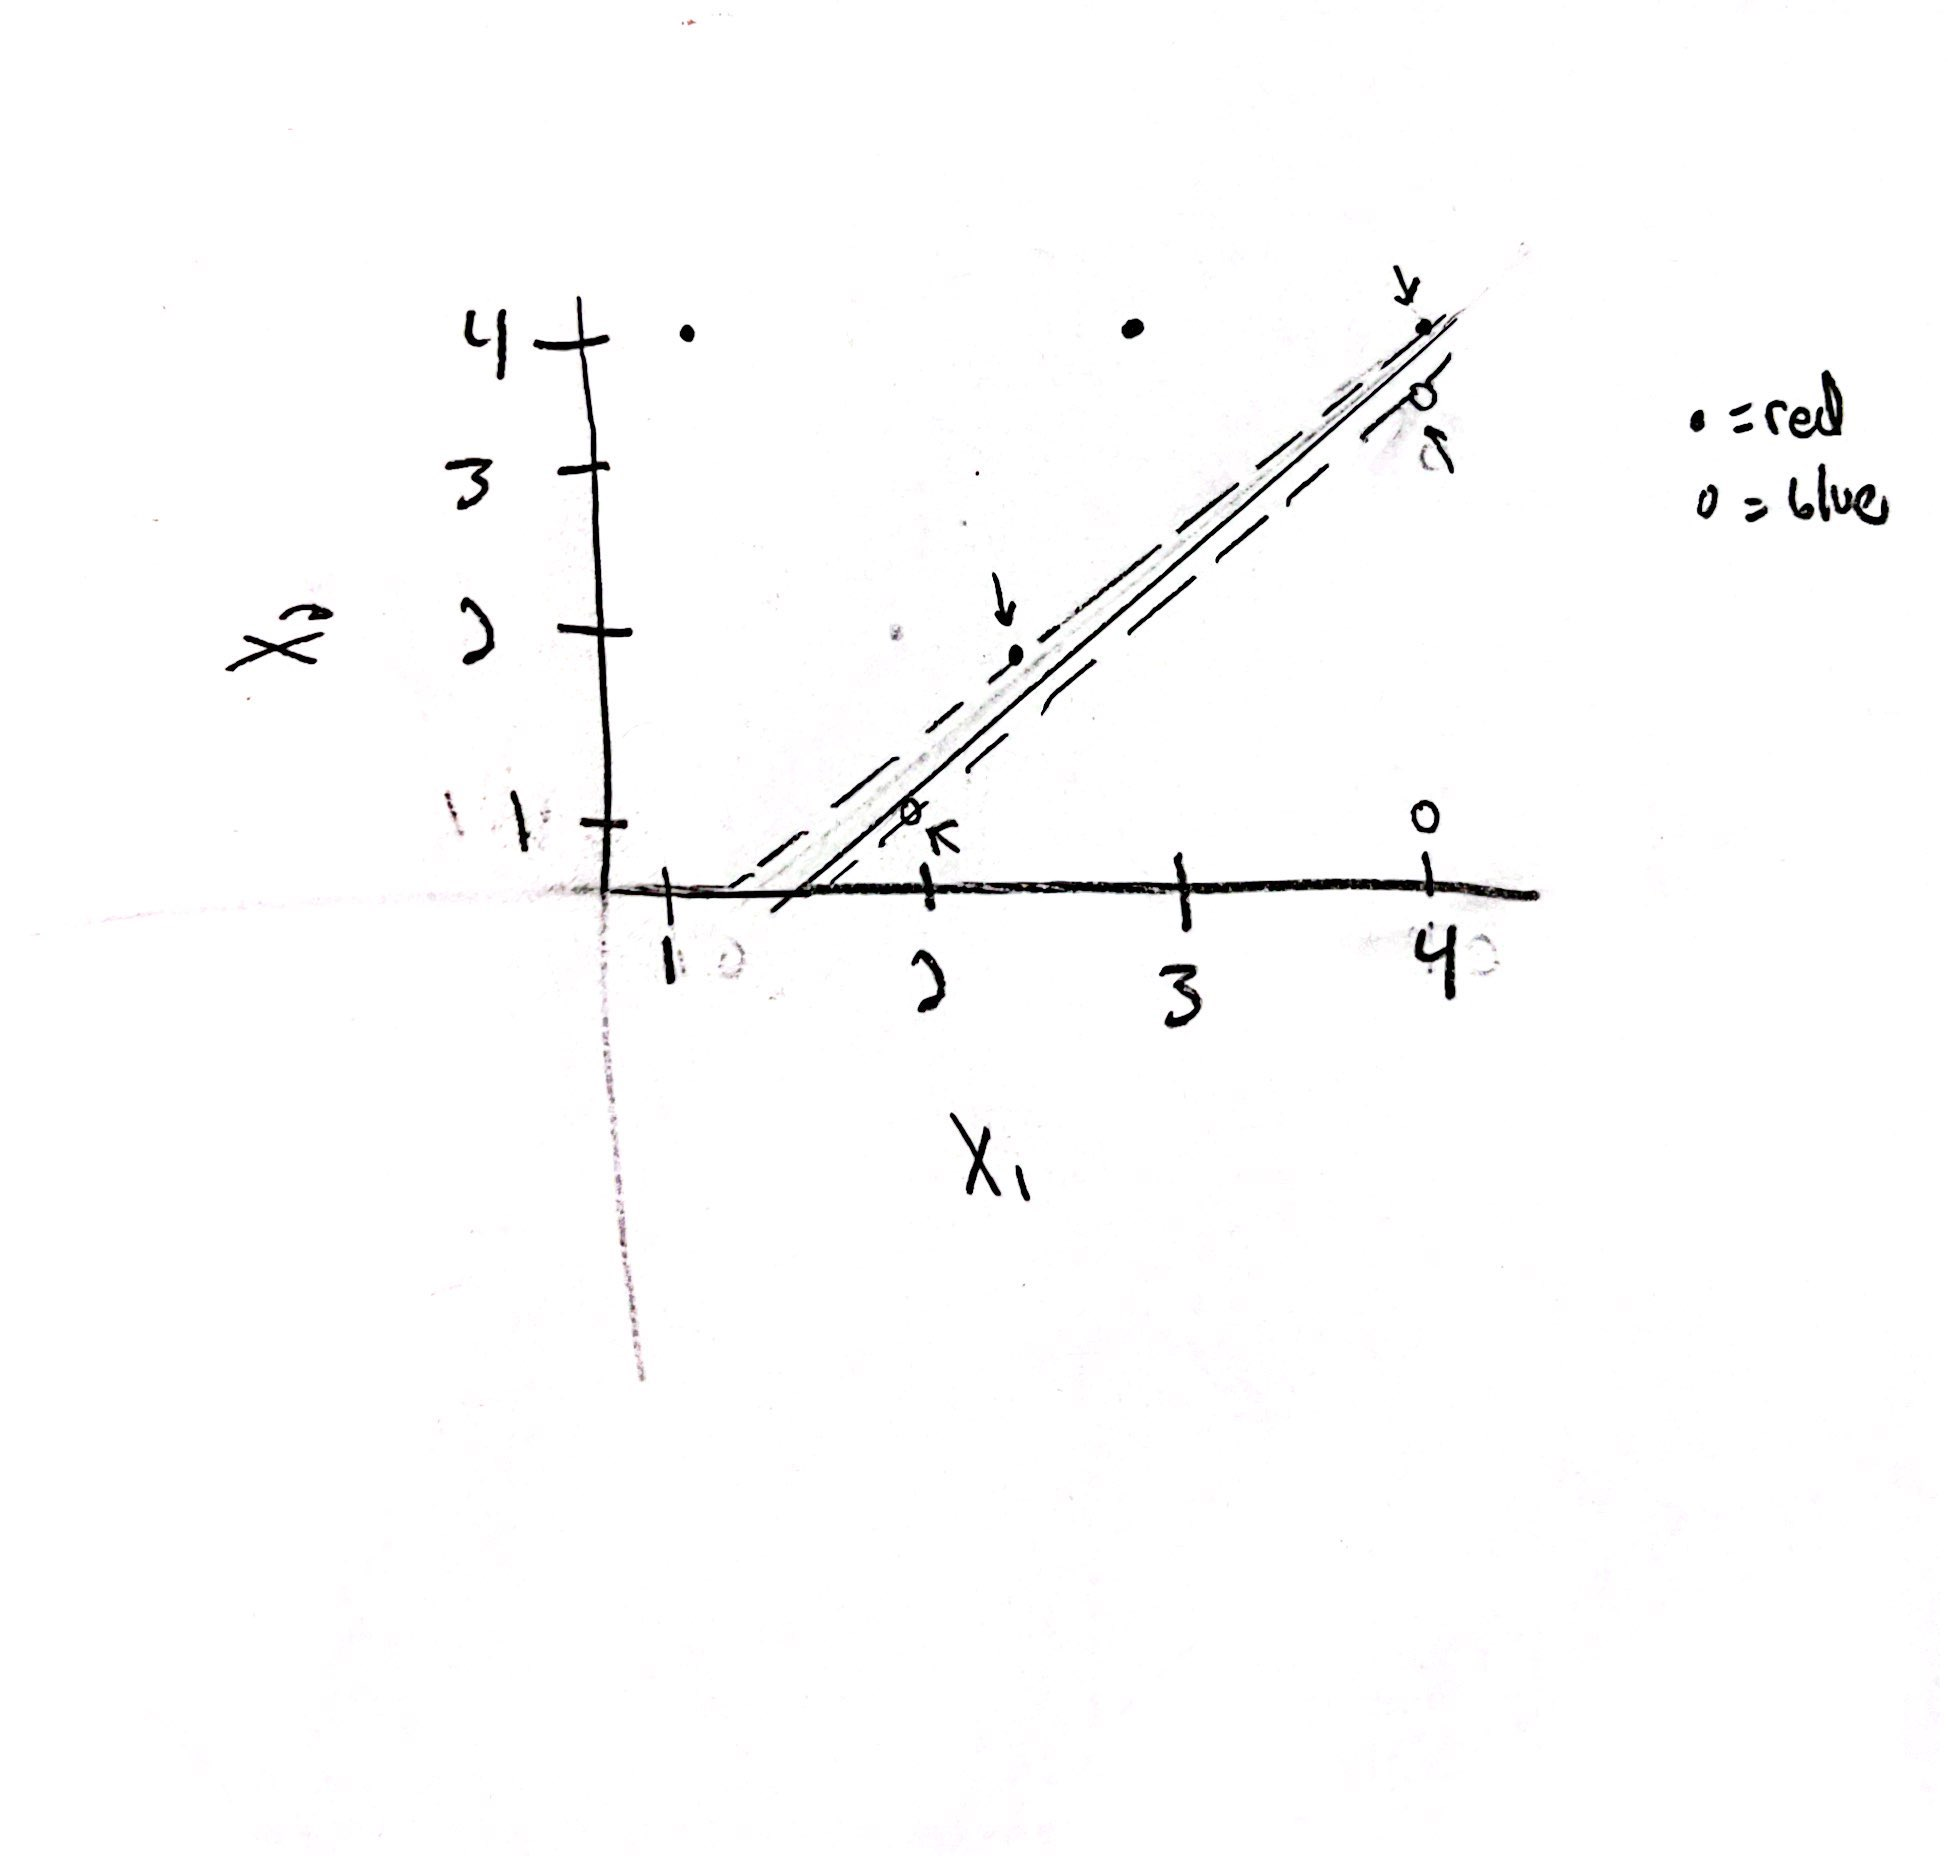

3c
The equation for red is: -.5-x1+x2<=0 
The equation for blue is: -.5-x1+x2>0 

b0 = -.5
b1 = -1
b2 = 1

3d: margin is the dotted lines 

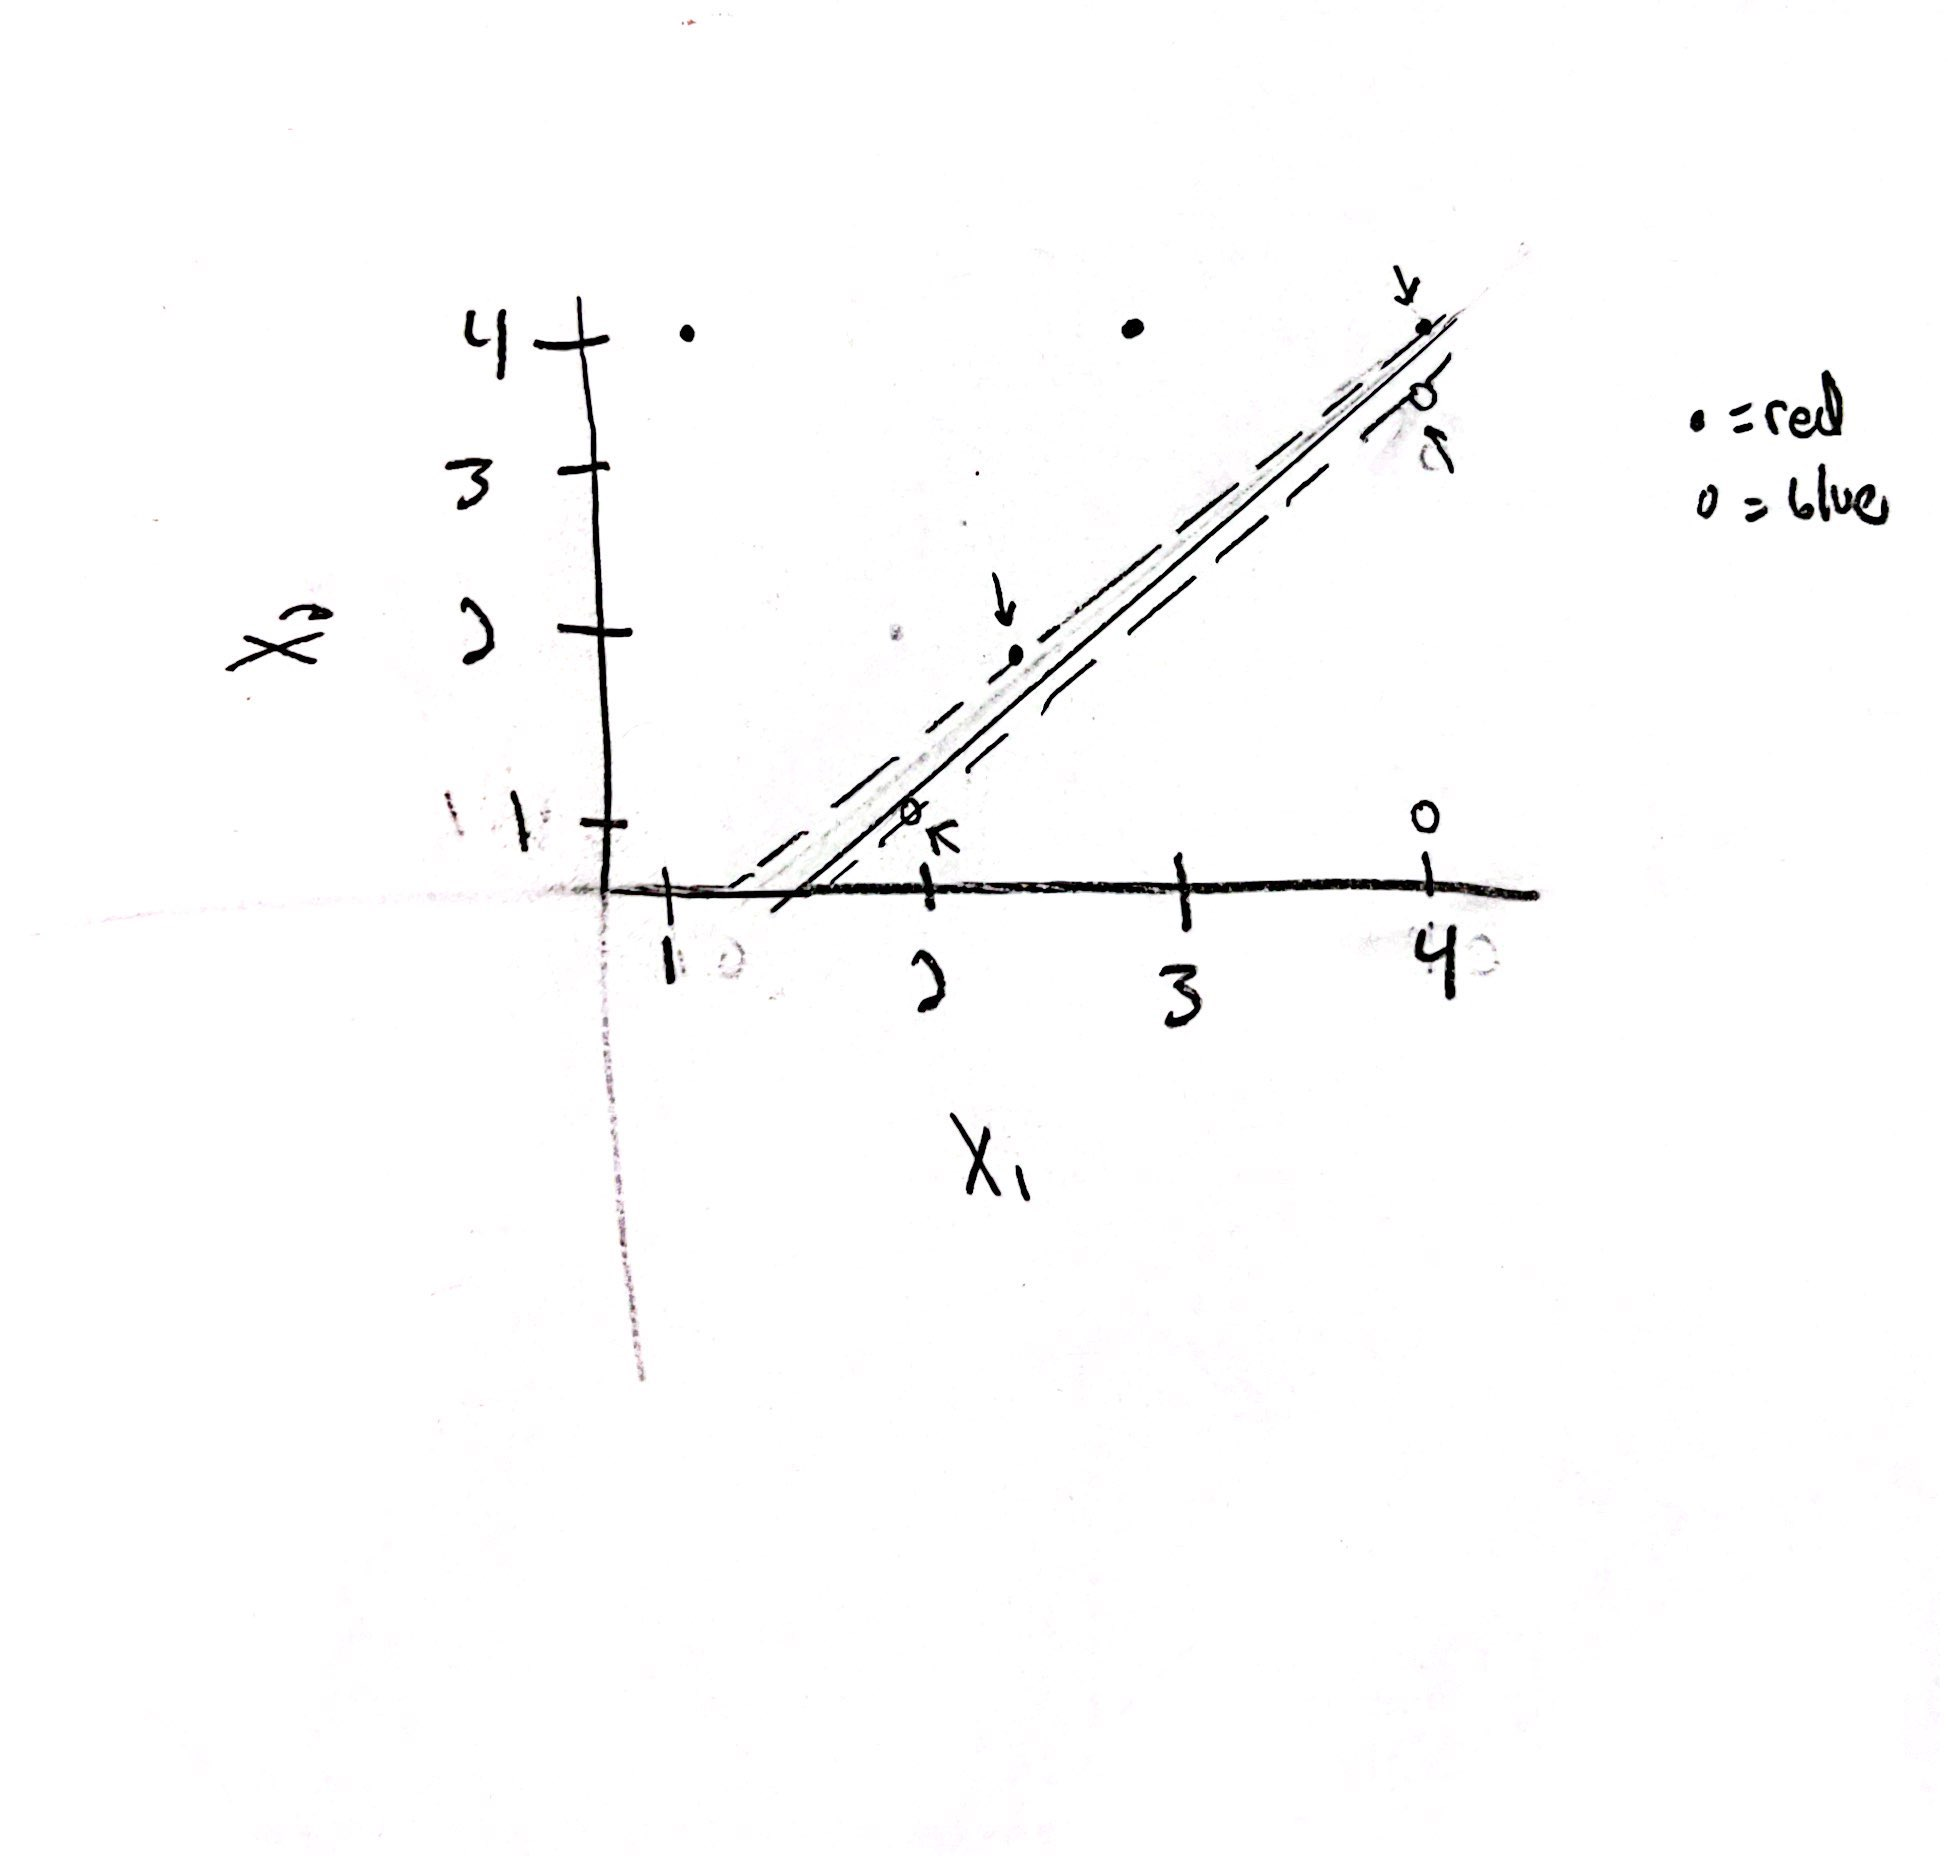

3e: There are four support vectors as inicated by the arrows 
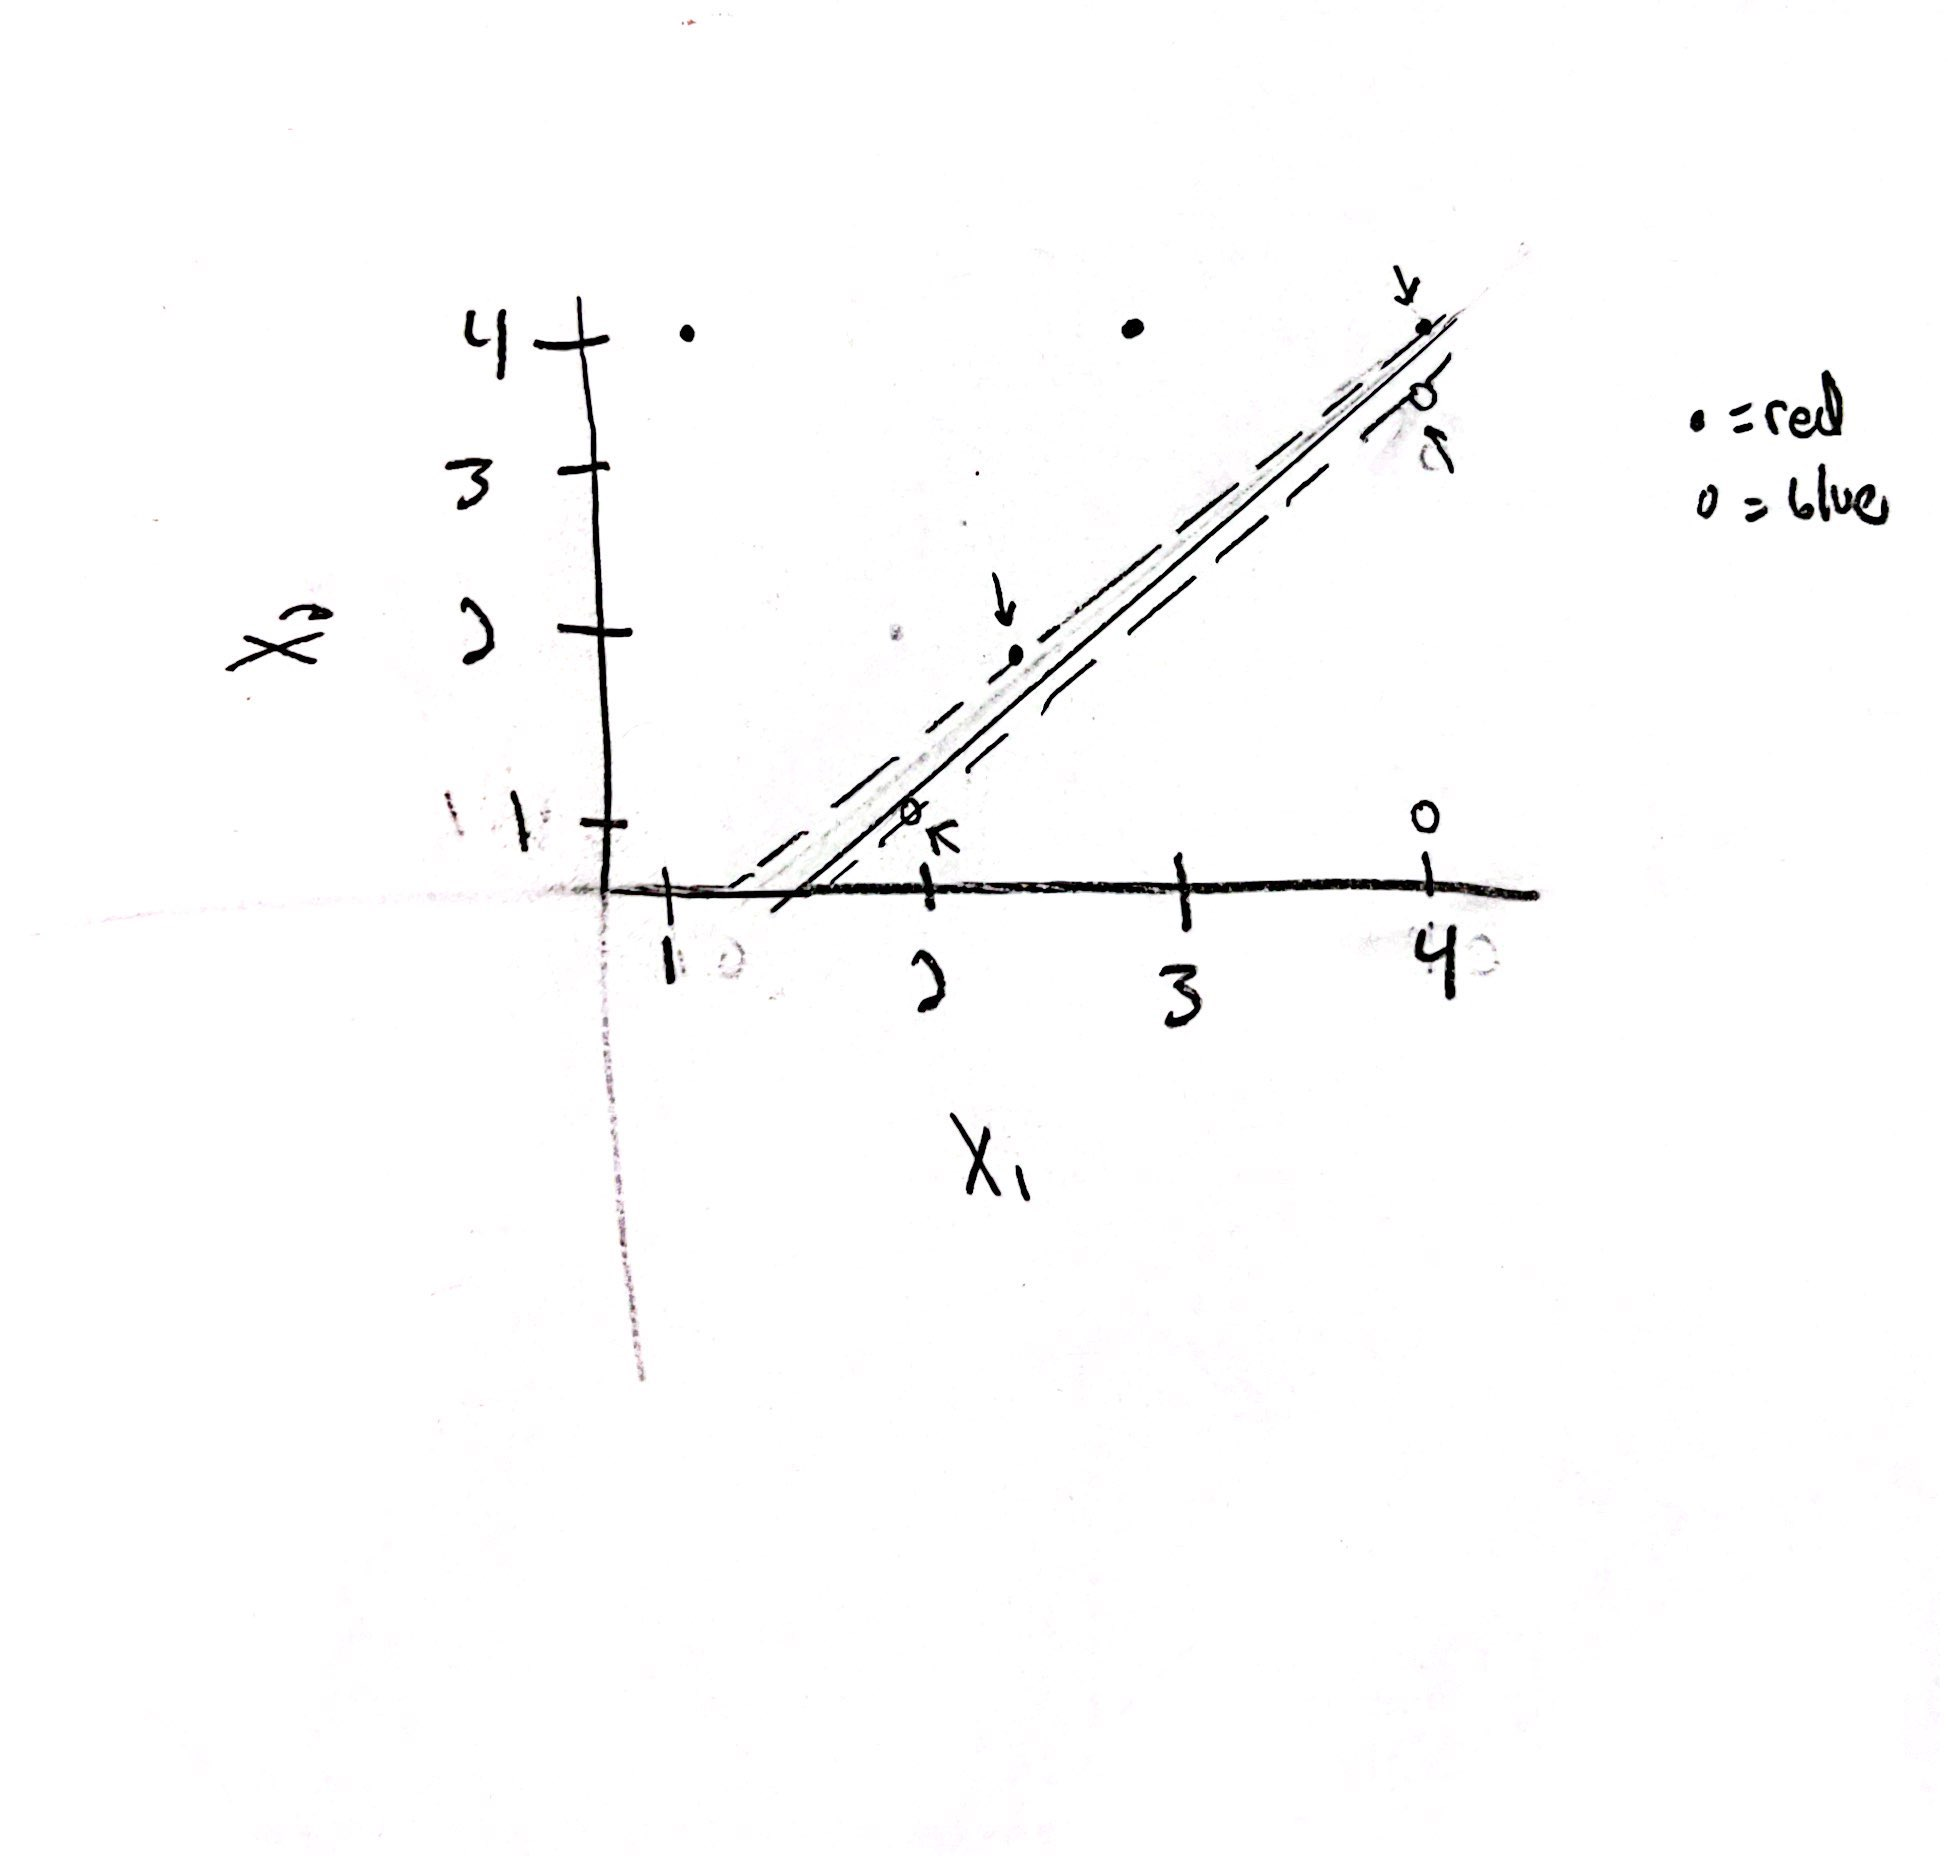

3f: The observation is nowhere near the support vectors, so it would not change anything. The best seperation would still be -.5 -x1+x2=0

3g:
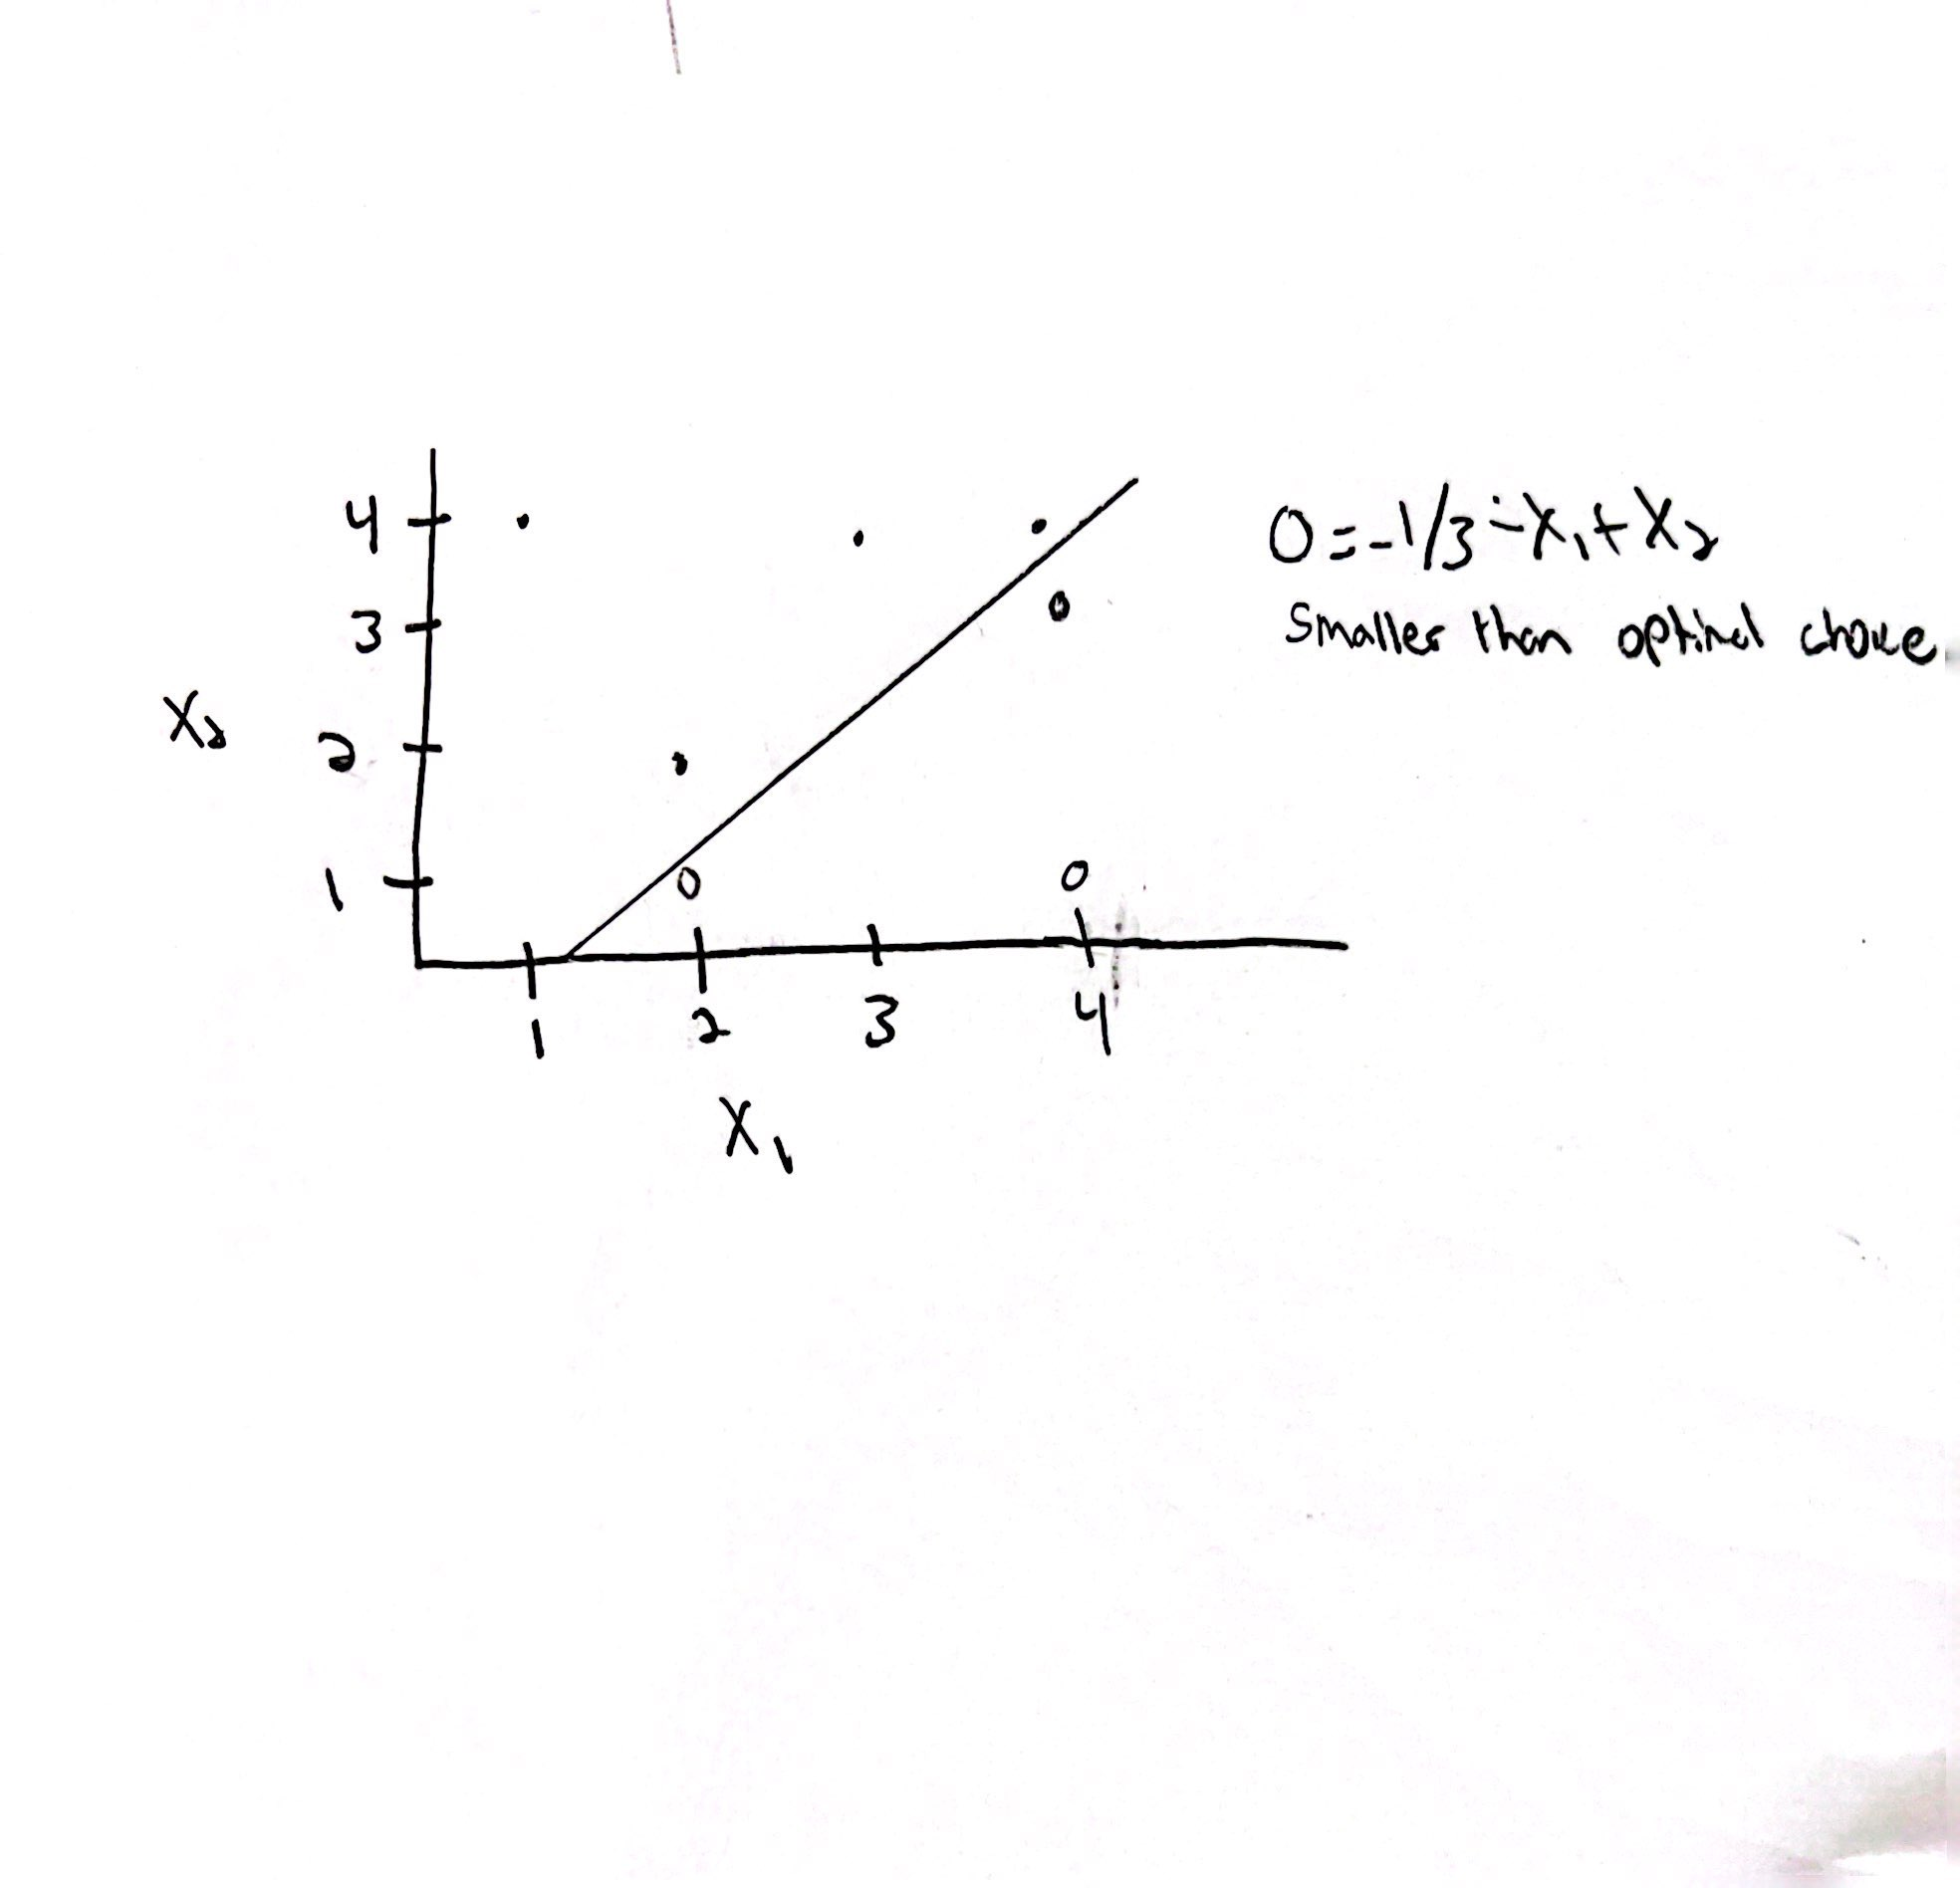

3h:
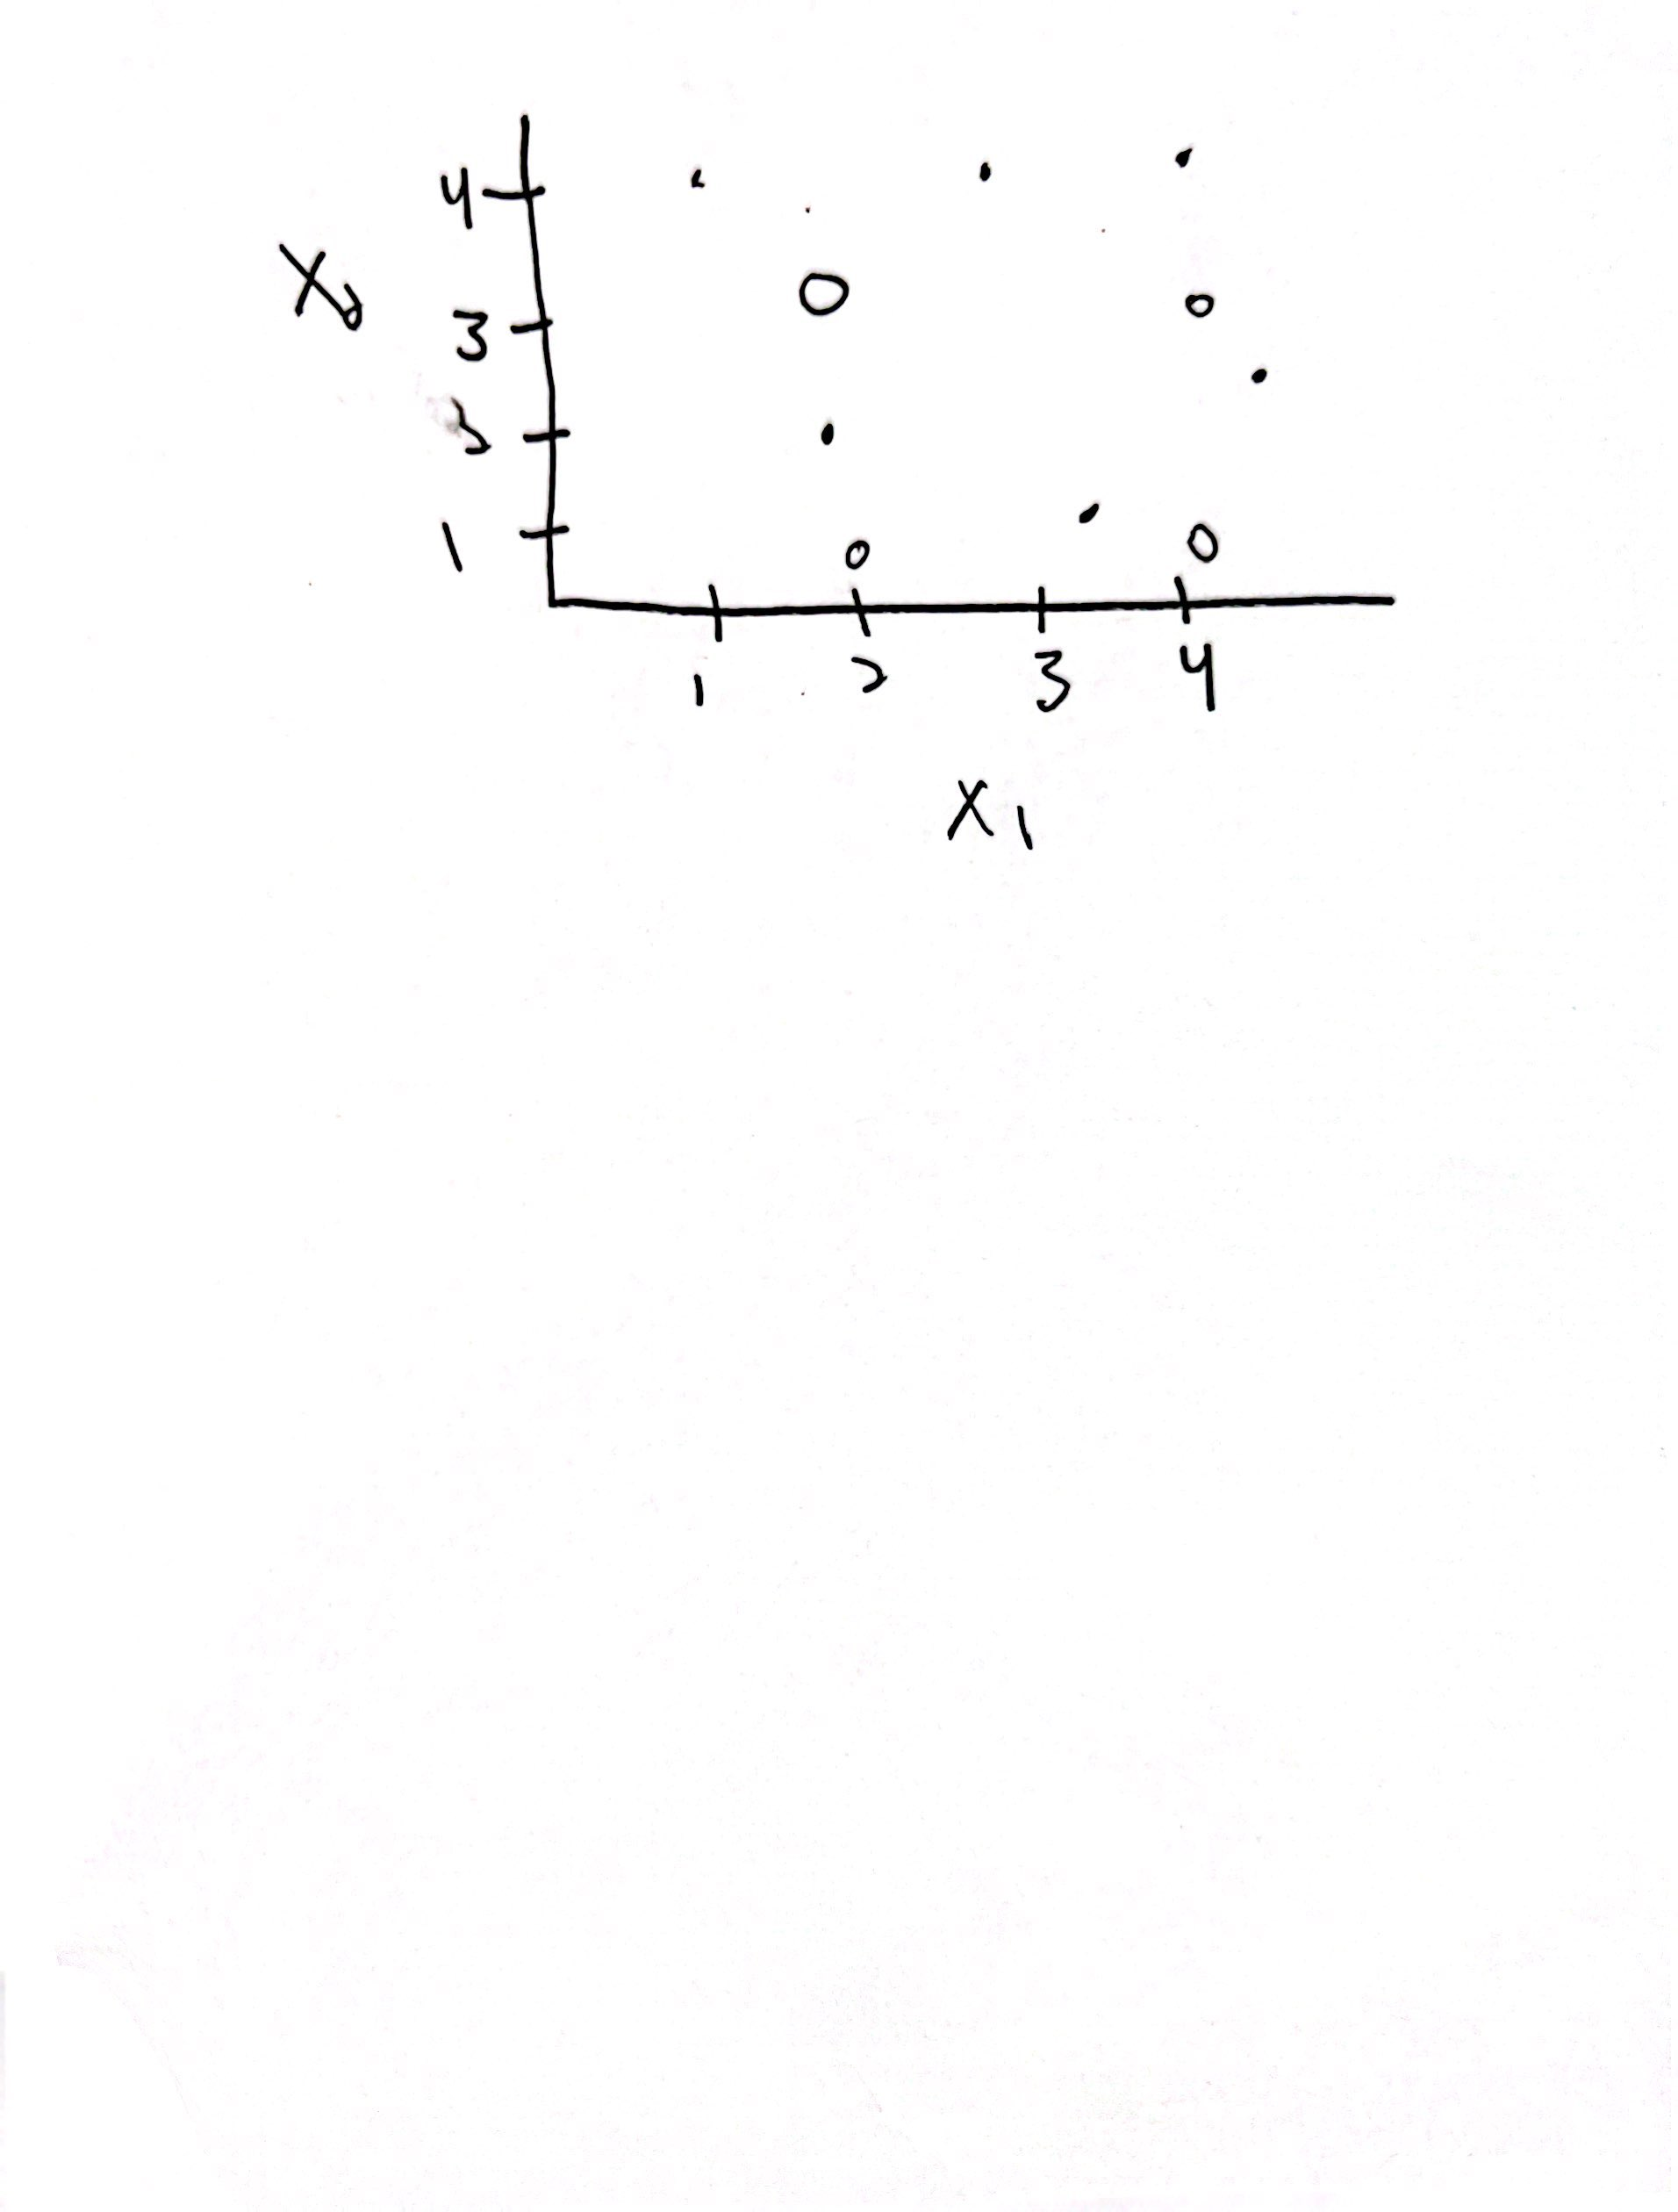